In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold

pd.set_option('display.max_columns', None)

In [128]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Train:', train.shape, ', Test:', test.shape)

Train: (1460, 81) , Test: (1459, 80)


In [ ]:
train.columns[train.isnull().any()]

In [ ]:
test.columns[test.isnull().any()]

# MISSING VALUE TREATMENT AND ENCODING

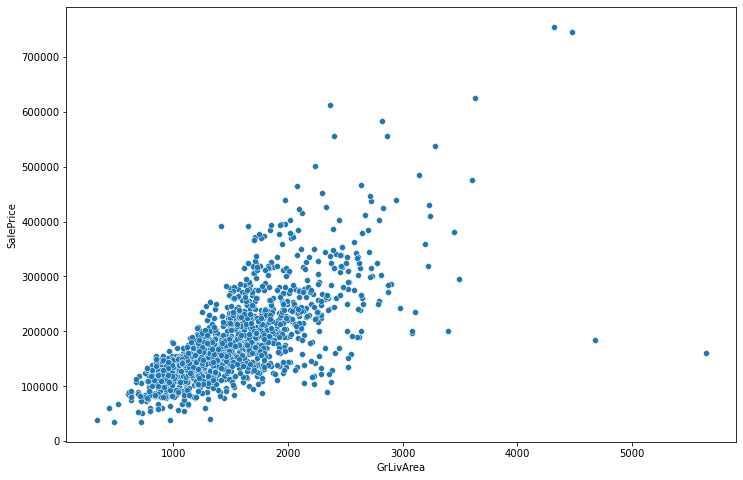

In [3]:
# Removal of outliers. 

plt.rcParams['figure.figsize'] = [12, 8]

sns.scatterplot(data=train, x=train.GrLivArea, y=train.SalePrice)
plt.show()

There are a few houses that are very large that have been sold for a small price. 
Besides, there are very few examples in the region beyond x>4000

In [ ]:
train = train[train.GrLivArea <= 4000]
train.shape

This resulted in a data loss of 4 instances.

In [129]:
def treat_null(X):
    
    # add comments and reasoning for each

    X.loc[:, 'Alley'] = X.loc[:, 'Alley'].fillna('None')

    X.loc[:, 'BedroomAbvGr'] = X.loc[:, 'BedroomAbvGr'].fillna(0)

    X.loc[:, 'BsmtQual'] = X.loc[: 'BsmtQual'].fillna('No')
    
    X.loc[:, 'BsmtCond'] = X.loc[:, 'BsmtCond'].fillna('No')
    
    X.loc[:, 'BsmtExposure'] = X.loc[:, 'BsmtExposure'].fillna('No')
    
    X.loc[:, 'BsmtFinSF1'] = X.loc[:, 'BsmtFinSF1'].fillna(train['BsmtFinSF1'].median())
    
    X.loc[:, 'BsmtFinSF2'] = X.loc[:, 'BsmtFinSF2'].fillna(train['BsmtFinSF2'].median())
    
    X.loc[:, 'BsmtFinType1'] = X.loc[:, 'BsmtFinType1'].fillna('No')
    
    X.loc[:, 'BsmtFinType2'] = X.loc[:, 'BsmtFinType2'].fillna('No')
    
    X.loc[:, 'BsmtFullBath'] = X.loc[:, 'BsmtFullBath'].fillna(0)
    
    X.loc[:, 'BsmtHalfBath'] = X.loc[:, 'BsmtHalfBath'].fillna(0)
    
    X.loc[:, 'BsmtUnfSF'] = X.loc[:, 'BsmtUnfSF'].fillna(0)
    
    X.loc[:, 'CentralAir'] = X.loc[:, 'CentralAir'].fillna('No')
    
    X.loc[:, "Condition1"] = X.loc[:, "Condition1"].fillna("Norm")
    
    X.loc[:, "Condition2"] = X.loc[:, "Condition2"].fillna("Norm")

    X.loc[:, 'Electrical'] = X.loc[:, 'Electrical'].fillna('SBrkr')
    
    X.loc[:, "EnclosedPorch"] = X.loc[:, "EnclosedPorch"].fillna(0)

    X.loc[:, "ExterCond"] = X.loc[:, "ExterCond"].fillna("TA")
    
    X.loc[:, 'Exterior1st'] = X.loc[:, 'Exterior1st'].fillna(train['Exterior1st'].mode()[0])
    
    X.loc[:, 'Exterior2nd'] = X.loc[:, 'Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
    
    X.loc[:, "ExterQual"] = X.loc[:, "ExterQual"].fillna("TA")

    X.loc[:, "Fence"] = X.loc[:, "Fence"].fillna("No")

    X.loc[:, "FireplaceQu"] = X.loc[:, "FireplaceQu"].fillna("No")
    
    X.loc[:, "Fireplaces"] = X.loc[:, "Fireplaces"].fillna(0)

    X.loc[:, "Functional"] = X.loc[:, "Functional"].fillna("Typ")
    
    X.loc[:, "GarageType"] = X.loc[:, "GarageType"].fillna("No")
    
    X.loc[:, "GarageFinish"] = X.loc[:, "GarageFinish"].fillna("No")
    
    X.loc[:, "GarageQual"] = X.loc[:, "GarageQual"].fillna("No")

    X.loc[:, "GarageCond"] = X.loc[:, "GarageCond"].fillna("No")

    X.loc[:, "GarageArea"] = X.loc[:, "GarageArea"].fillna(0)

    X.loc[:, "GarageCars"] = X.loc[:, "GarageCars"].fillna(0)

    X.loc[:, "HalfBath"] = X.loc[:, "HalfBath"].fillna(0)

    X.loc[:, "HeatingQC"] = X.loc[:, "HeatingQC"].fillna("TA")

    X.loc[:, "KitchenAbvGr"] = X.loc[:, "KitchenAbvGr"].fillna(0)
   
    X.loc[:, "KitchenQual"] = X.loc[:, "KitchenQual"].fillna("TA")

    X.loc[:, "LotFrontage"] = X.loc[:, "LotFrontage"].fillna(0)

    X.loc[:, "LotShape"] = X.loc[:, "LotShape"].fillna("Reg")

    X.loc[:, "MasVnrType"] = X.loc[:, "MasVnrType"].fillna("None")
    
    X.loc[:, "MasVnrArea"] = X.loc[:, "MasVnrArea"].fillna(0)
    
    X.loc[:, "MiscFeature"] = X.loc[:, "MiscFeature"].fillna("No")

    X.loc[:, "MiscVal"] = X.loc[:, "MiscVal"].fillna(0)
    
    X.loc[:, "MSZoning"] = X.loc[:, 'MSZoning'].fillna(train['MSZoning'].mode()[0])

    X.loc[:, "OpenPorchSF"] = X.loc[:, "OpenPorchSF"].fillna(0)

    X.loc[:, "PavedDrive"] = X.loc[:, "PavedDrive"].fillna("N")

    X.loc[:, "PoolQC"] = X.loc[:, "PoolQC"].fillna("No")
    
    X.loc[:, "PoolArea"] = X.loc[:, "PoolArea"].fillna(0)

    X.loc[:, "SaleCondition"] = X.loc[:, "SaleCondition"].fillna("Normal")
    
    X.loc[:, 'SaleType'] = X.loc[:, 'SaleType'].fillna(train['SaleType'].mode()[0])

    X.loc[:, "ScreenPorch"] = X.loc[:, "ScreenPorch"].fillna(0)
    
    X.loc[:, 'TotalBsmtSF'] = X.loc[:, 'TotalBsmtSF'].fillna(train['TotalBsmtSF'].median())

    X.loc[:, "TotRmsAbvGrd"] = X.loc[:, "TotRmsAbvGrd"].fillna(0)

    X.loc[:, "Utilities"] = X.loc[:, "Utilities"].fillna("AllPub")

    X.loc[:, "WoodDeckSF"] = X.loc[:, "WoodDeckSF"].fillna(0)
    
    X.loc[:, 'GarageYrBlt'] = X.loc[: 'GarageYrBlt'].fillna(train['GarageYrBlt'].median())


In [130]:
train.columns[train.isna().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
print(train[['GarageYrBlt', 'SalePrice']].corr())
sns.scatterplot(x=train_num['GarageYrBlt'], y=train_num['SalePrice'])
plt.show()

Imputing the missing values in GarageYrBlt retains the correlation present between GarageYrBlt and SalePrice to a fair extent.

In [131]:
# replacing numeric features that are actually really categories

def replace_numeric_with_cat(X):
    X = X.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })
    return X

In [10]:
# ordinally encoding categories

def ordinal_encode(X):
    X = X.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )
    
    return X

Checking for columns that are actually categorical and choosing to including the ordinal categories in numeric

     'Street' - replace 2 with 1, and 1 with 0, switch to categoric

In [ ]:
train_num['Street'].value_counts()

We will drop this column from numeric and add it to categoric

In [149]:
def split_num_cat(X):
    X_num = X.select_dtypes(np.number)
    
    X_num.loc[:, 'Street'] = X_num['Street'].replace({2: 1, 1: 0})
    
    X_cat = X.select_dtypes('object')
    
    X_cat = pd.concat([X_cat, X_num['Street']], axis=1)
    X_num.drop('Street', axis=1, inplace=True)
    
    return X_num, X_cat

In [157]:
from sklearn.preprocessing import OneHotEncoder

def enc_categoric(train_cat, test_cat):
    
    all_data = train_cat
    
    all_data = all_data.append(test_cat, ignore_index=True)
    
    all_data_enc = pd.get_dummies(all_data, drop_first=True)
    
    train_cat_enc = all_data_enc.iloc[:train_cat.shape[0]]
    test_cat_enc = all_data_enc.iloc[train_cat_enc.shape[0]:]
    test_cat_enc.index = test_cat.index
    
    return train_cat_enc, test_cat_enc

In [132]:
def X_pipeline(data):
    treat_null(data)
    data = replace_numeric_with_cat(data)
    data = ordinal_encode(data)
     
    #impute_garagebuilt_knn(data, knn_impute)
    X_numeric, X_categoric = split_num_cat(data)
    
    X_numeric.drop('Id', axis=1, inplace=True)
   
    if 'SalePrice' in X_numeric.columns:
        X_numeric.drop('SalePrice', axis=1, inplace=True)
    
    return X_numeric, X_categoric


In [15]:
from sklearn.preprocessing import StandardScaler

def encode_and_scale(train_numeric, train_categoric, test_numeric, test_categoric):
    
    scale = StandardScaler()
    scale.fit(train_numeric)
    train_numeric_scaled = scale.transform(train_numeric)
    test_numeric_scaled = scale.transform(test_numeric)
    
    train_numeric_scaled = pd.DataFrame(train_numeric_scaled, columns=train_numeric.columns)
    test_numeric_scaled = pd.DataFrame(train_numeric_scaled, columns=test_numeric.columns)
    
    train_cat_enc, test_cat_enc = enc_categoric(train_categoric, test_categoric)
    
    return train_numeric_scaled, train_cat_enc, test_numeric_scaled, test_cat_enc

In [158]:
train_numeric, train_categoric = X_pipeline(train)
test_numeric, test_categoric = X_pipeline(test)

train_numeric_scaled, train_cat_enc, test_numeric_scaled, test_cat_enc = encode_and_scale(train_numeric, 
                                                                                         train_categoric, 
                                                                                         test_numeric, 
                                                                                         test_categoric)

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [160]:
train_full = pd.concat([train_numeric, train_cat_enc], axis=1)
test_full = pd.concat([test_numeric, test_cat_enc], axis=1)

In [152]:
train_numeric

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold
0,65.0,8450,4,4,3,7,5,2003,2003,196.0,4,3,4,3,0,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,2003.0,2,548,3,3,2,0,61,0,0,0,0,0,0,2008
1,80.0,9600,4,4,3,6,8,1976,1976,0.0,3,3,4,3,3,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,1976.0,2,460,3,3,2,298,0,0,0,0,0,0,0,2007
2,68.0,11250,3,4,3,7,5,2001,2002,162.0,4,3,4,3,1,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,2001.0,2,608,3,3,2,0,42,0,0,0,0,0,0,2008
3,60.0,9550,3,4,3,7,5,1915,1970,0.0,3,3,3,4,0,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,1998.0,3,642,3,3,2,0,35,272,0,0,0,0,0,2006
4,84.0,14260,3,4,3,8,5,2000,2000,350.0,4,3,4,3,2,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,2000.0,3,836,3,3,2,192,84,0,0,0,0,0,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,4,4,3,6,5,1999,2000,0.0,3,3,4,3,0,1,0,1,0,953,953,5,953,694,0,1647,0,0,2,1,3,1,3,7,8,1,3,1999.0,2,460,3,3,2,0,40,0,0,0,0,0,0,2007
1456,85.0,13175,4,4,3,6,6,1978,1988,119.0,3,3,4,3,0,5,790,3,163,589,1542,3,2073,0,0,2073,1,0,2,0,3,1,3,7,7,2,3,1978.0,2,500,3,3,2,349,0,0,0,0,0,0,0,2010
1457,66.0,9042,4,4,3,7,9,1941,2006,0.0,5,4,3,4,0,6,275,1,0,877,1152,5,1188,1152,0,2340,0,0,2,0,4,1,4,9,8,2,4,1941.0,1,252,3,3,2,0,60,0,0,0,0,0,2500,2010
1458,68.0,9717,4,4,3,5,6,1950,1996,0.0,3,3,3,3,1,6,49,3,1029,0,1078,4,1078,0,0,1078,1,0,1,0,2,1,4,5,8,0,0,1950.0,1,240,3,3,2,366,0,112,0,0,0,0,0,2010


# EDA

In [18]:
train_numeric_scaled.corr().style.background_gradient(cmap='coolwarm')

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold
LotFrontage,1.000000,0.100739,0.113294,0.043535,0.041567,0.176561,-0.053457,0.036853,0.078686,0.105010,0.127864,-0.046807,0.092717,0.015334,0.071068,-0.020307,0.076670,-0.015998,-0.009312,0.160829,0.238274,0.103589,0.245181,0.042549,0.049981,0.220347,0.010514,-0.027856,0.120548,-0.012952,0.144494,0.034425,0.127478,0.221396,0.004560,0.044018,0.084423,0.165229,0.201473,0.013147,0.013047,0.016838,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,0.151755,-0.059606,-0.012094
LotArea,0.100739,1.000000,-0.315484,-0.010123,-0.436868,0.105806,-0.005636,0.014228,0.013788,0.103321,0.055570,0.014732,0.072336,0.031349,0.232300,0.058995,0.214103,0.086629,0.111170,-0.002618,0.260833,0.003581,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.067864,0.190015,-0.025128,0.271364,0.185332,0.154871,0.180403,0.079313,0.076097,0.015134,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.091381,0.038068,-0.014261
LotShape,0.113294,-0.315484,1.000000,0.026616,0.144248,-0.198994,0.033747,-0.229365,-0.175488,-0.089800,-0.188668,-0.014073,-0.211557,-0.108252,-0.178891,-0.111492,-0.157718,-0.061513,-0.060419,-0.014179,-0.200469,-0.119556,-0.189251,-0.089380,0.007973,-0.212741,-0.064638,-0.057729,-0.184213,-0.116576,-0.060028,0.094870,-0.157933,-0.137148,-0.023444,-0.202019,-0.193112,-0.194984,-0.173472,-0.109218,-0.102864,-0.103643,-0.161717,-0.093135,0.095092,-0.033801,-0.065182,-0.047100,-0.053321,-0.028638,0.037391
Utilities,0.043535,-0.010123,0.026616,1.000000,-0.005909,0.001881,-0.009994,0.011505,0.034080,-0.063452,0.018054,0.006234,0.014613,-0.003086,0.016537,-0.030492,0.019100,-0.051441,-0.049913,0.012639,0.014233,0.003963,-0.012287,0.020818,0.003148,0.008545,0.021467,-0.103380,0.026862,0.019939,-0.004288,0.005536,-0.019268,-0.007769,-0.006206,-0.015721,-0.031450,-0.008161,-0.006372,-0.006873,-0.006954,-0.007586,0.019692,-0.028199,0.009407,0.003046,-0.102365,0.001798,0.001670,0.002296,-0.023353
LandSlope,0.041567,-0.436868,0.144248,-0.005909,1.000000,0.066450,-0.010355,0.073639,0.059105,0.021083,0.086525,0.039610,0.007085,-0.026608,-0.265739,-0.051000,-0.113834,-0.076465,-0.085518,0.116456,-0.032498,0.057444,-0.068323,0.009255,-0.013888,-0.043860,-0.116165,-0.070299,0.046936,-0.000781,0.048196,0.036467,0.039474,0.033768,0.095140,-0.123995,-0.051922,0.002683,-0.004826,0.005955,0.015895,0.024538,-0.095156,0.032622,0.008843,-0.008694,-0.052976,0.015505,0.014400,0.003518,0.002305
OverallQual,0.176561,0.105806,-0.198994,0.001881,0.066450,1.000000,-0.091932,0.572323,0.550684,0.407252,0.726278,0.013953,0.629379,0.268759,0.273214,0.232503,0.239666,-0.044349,-0.059119,0.308159,0.537808,0.457083,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.673331,0.427452,0.145436,0.396765,0.490788,0.600671,0.562022,0.292399,0.286955,0.229393,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,0.085278,-0.031406,-0.027347
OverallCond,-0.053457,-0.005636,0.033747,-0.009994,-0.010355,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.138942,0.389163,-0.164996,0.132361,-0.071234,-0.014479,-0.046231,0.101674,0.040229,-0.136841,-0.171098,-0.014105,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.026707,-0.057583,0.118909,-0.023820,-0.056899,-0.185758,-0.151521,0.019060,0.016706,-0.062236,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,-0.014885,0.068777,0.043950
YearBuilt,0

# Exploring the effect of outlier treatment on model performance

Id


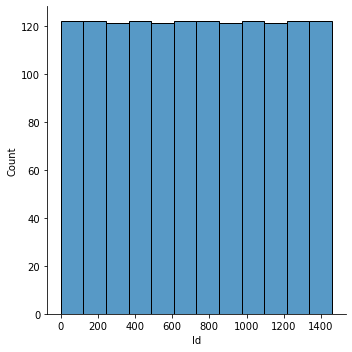

MSSubClass


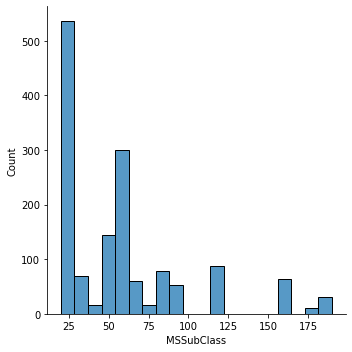

LotFrontage


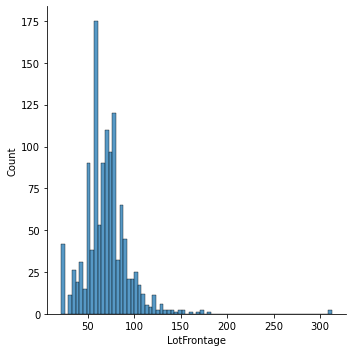

LotArea


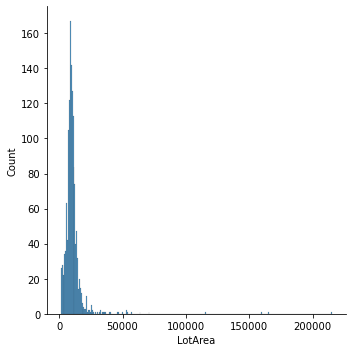

OverallQual


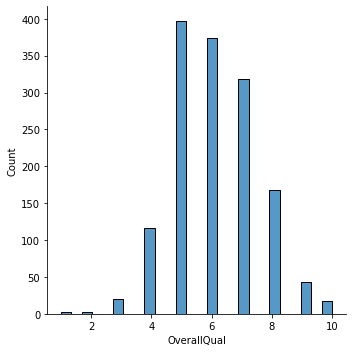

OverallCond


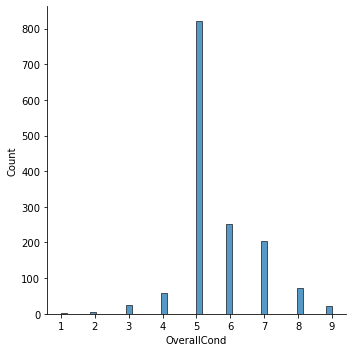

YearBuilt


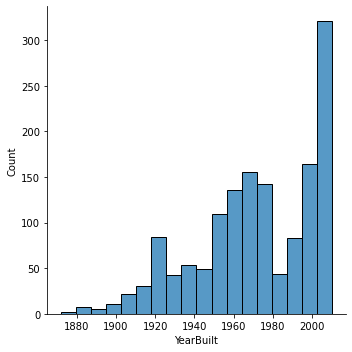

YearRemodAdd


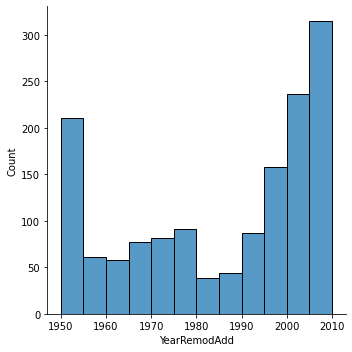

MasVnrArea


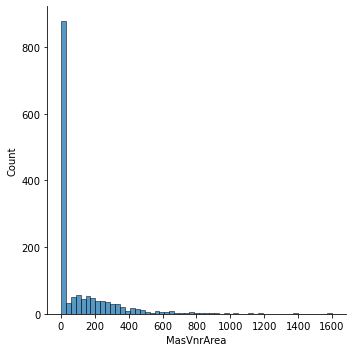

BsmtFinSF1


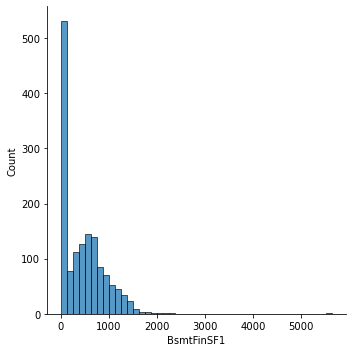

BsmtFinSF2


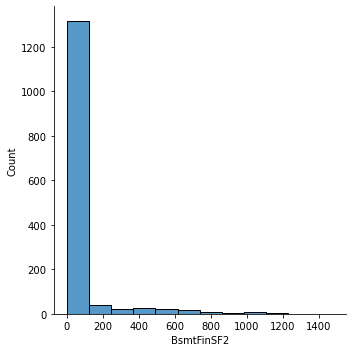

BsmtUnfSF


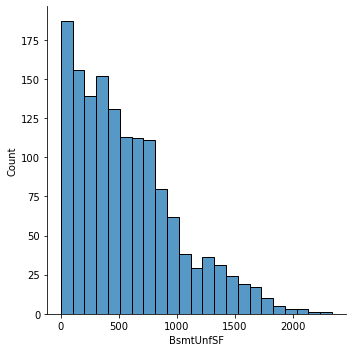

TotalBsmtSF


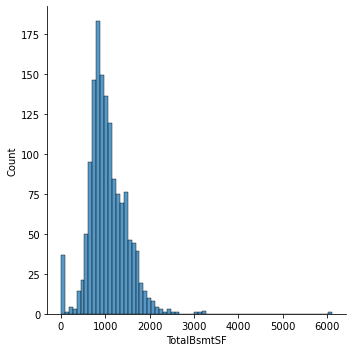

1stFlrSF


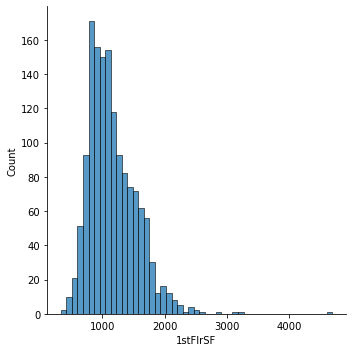

2ndFlrSF


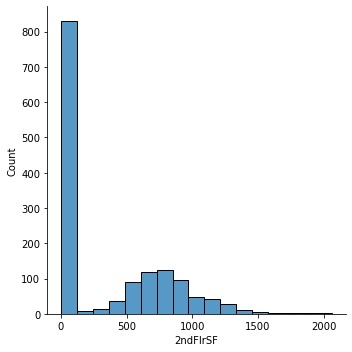

LowQualFinSF


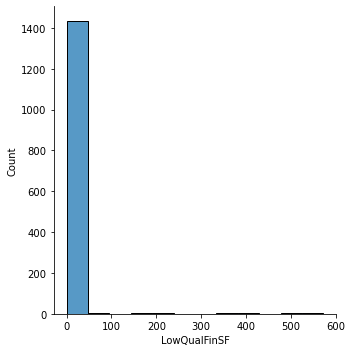

GrLivArea


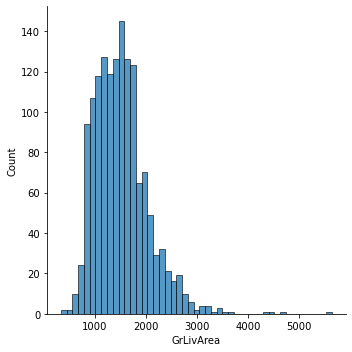

BsmtFullBath


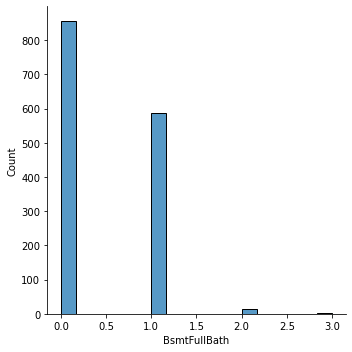

BsmtHalfBath


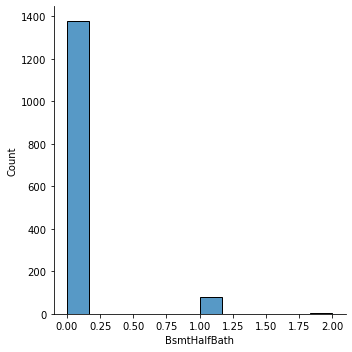

FullBath


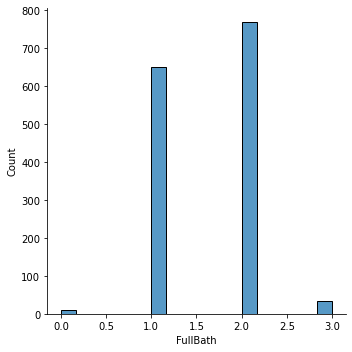

HalfBath


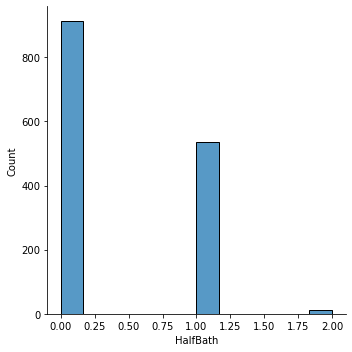

BedroomAbvGr


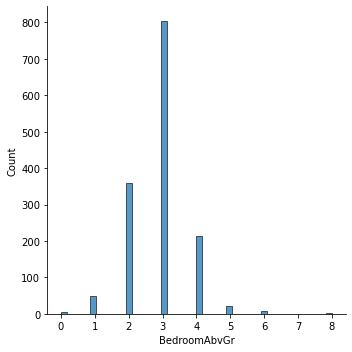

KitchenAbvGr


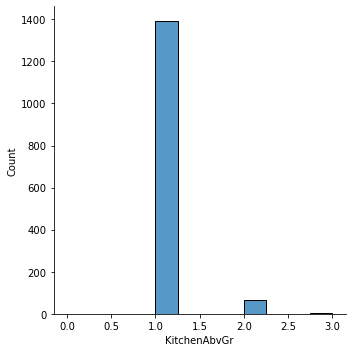

TotRmsAbvGrd


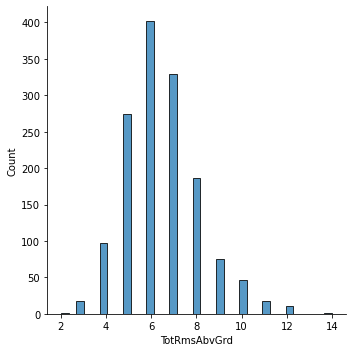

Fireplaces


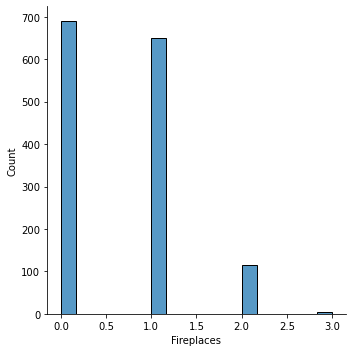

GarageYrBlt


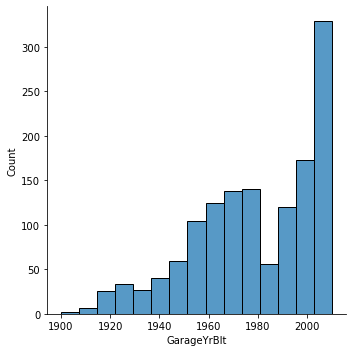

GarageCars


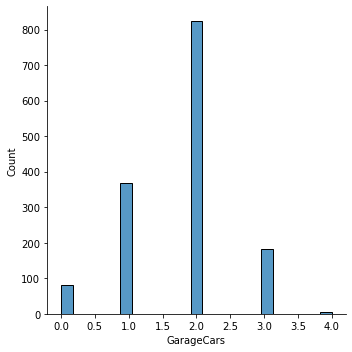

GarageArea


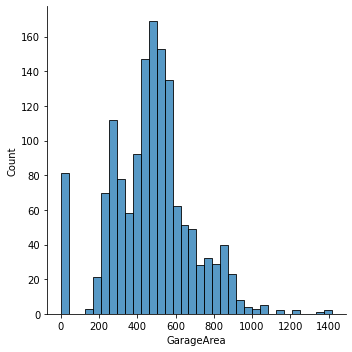

WoodDeckSF


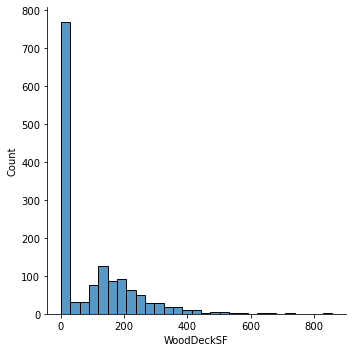

OpenPorchSF


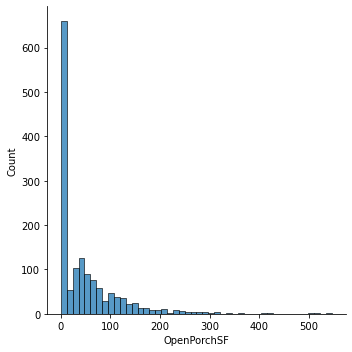

EnclosedPorch


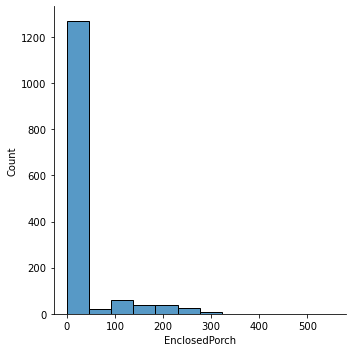

3SsnPorch


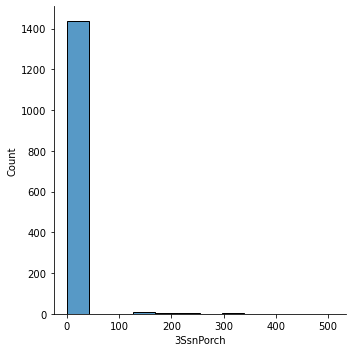

ScreenPorch


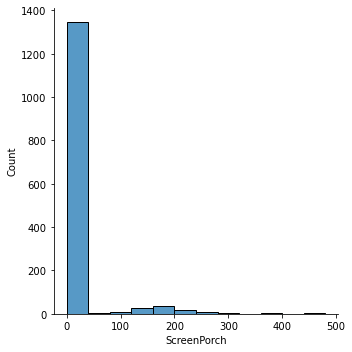

PoolArea


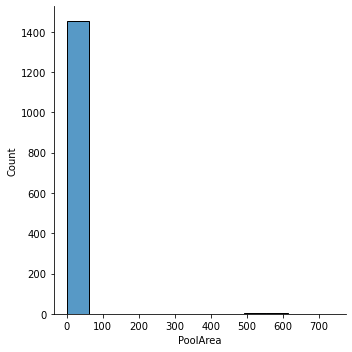

MiscVal


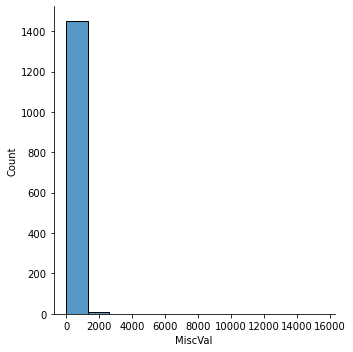

MoSold


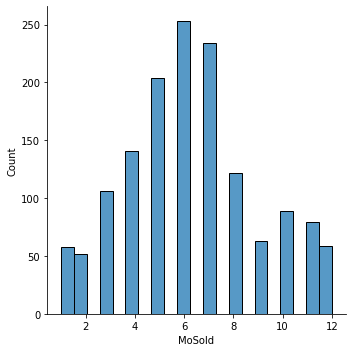

YrSold


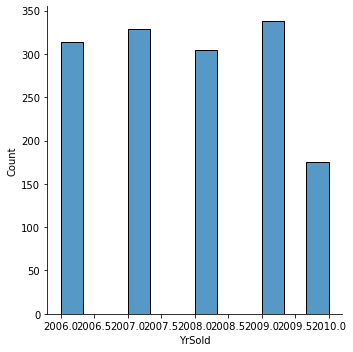

SalePrice


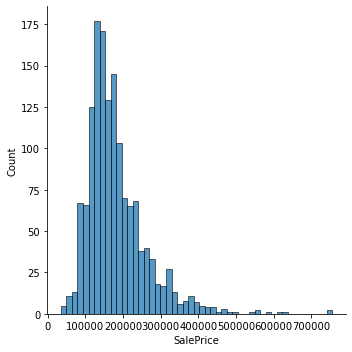

In [19]:
for col in train_num.columns:
    sns.displot(x=train_num[col])
    print(col)
    plt.show()

Id


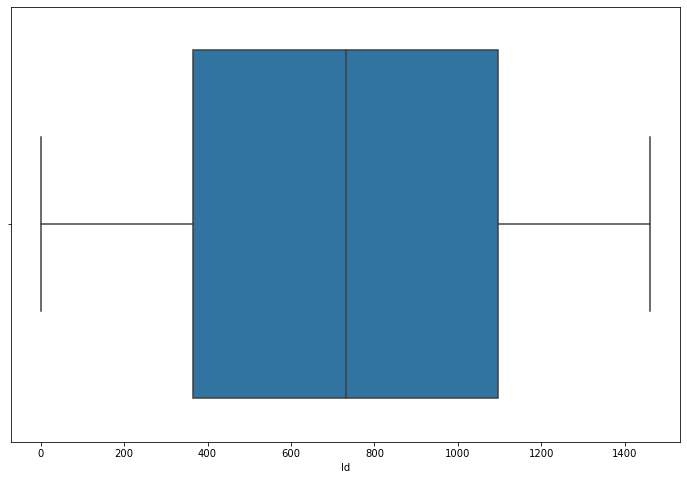

MSSubClass


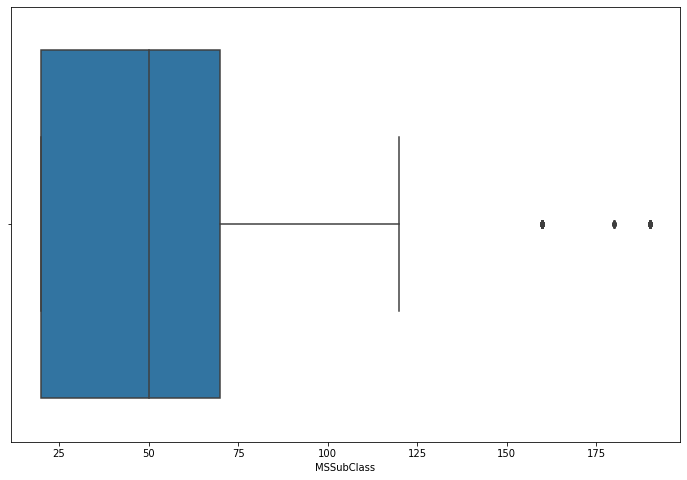

LotFrontage


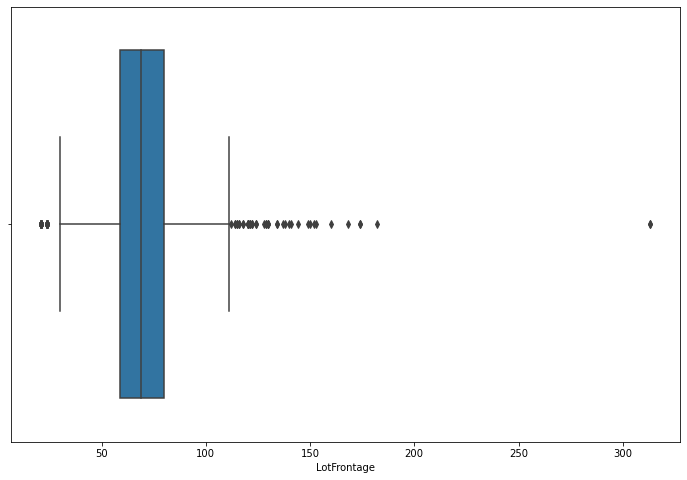

LotArea


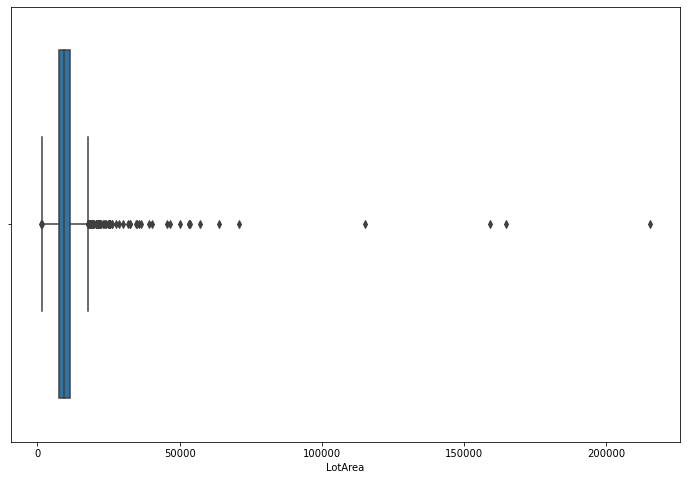

OverallQual


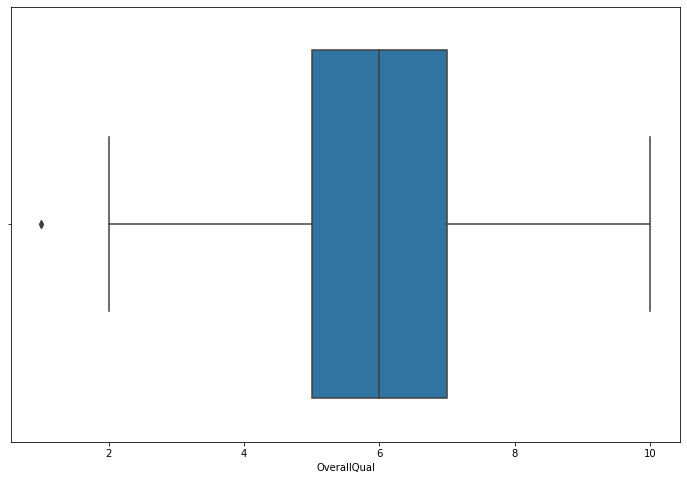

OverallCond


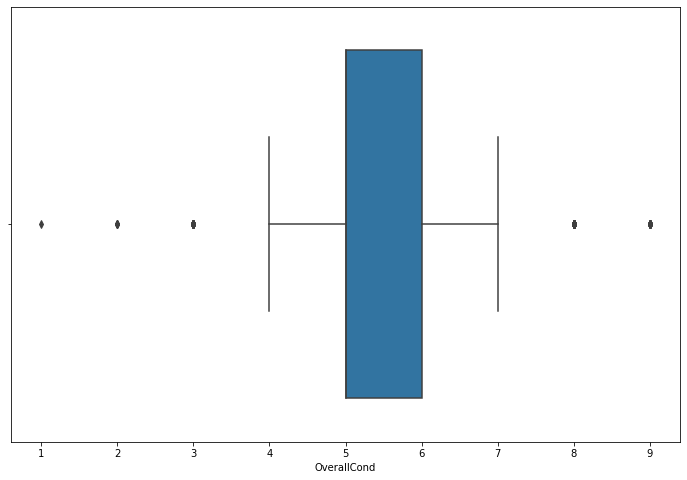

YearBuilt


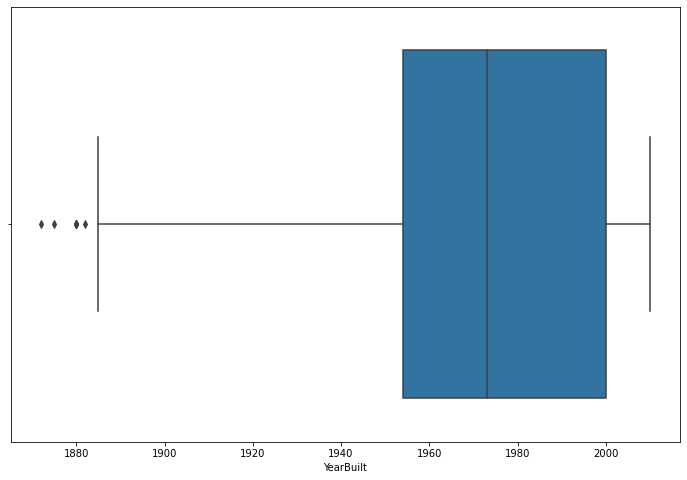

YearRemodAdd


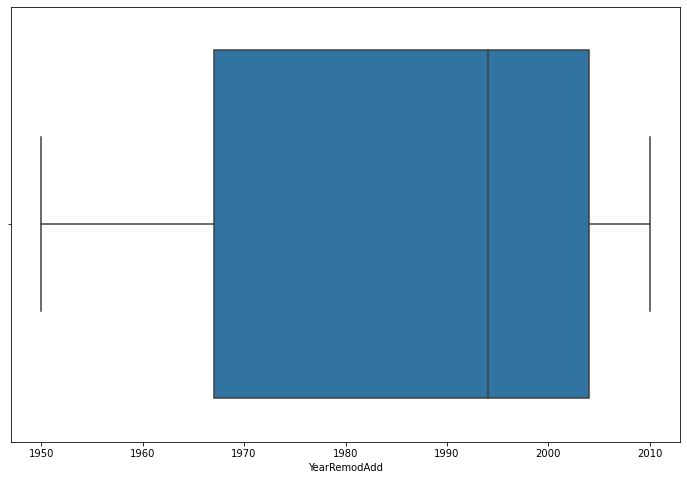

MasVnrArea


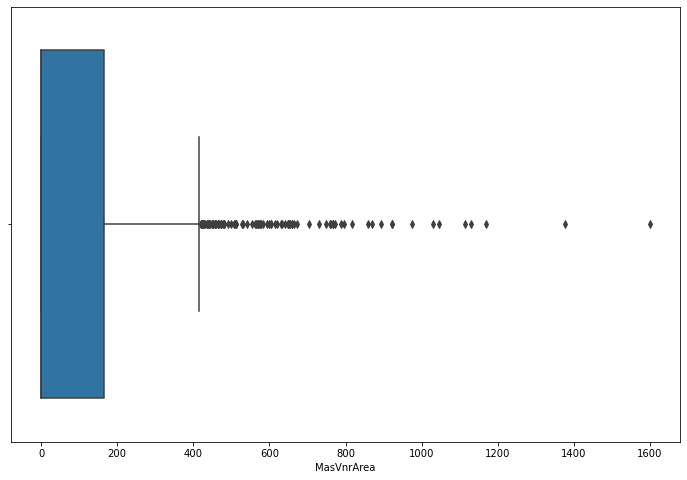

BsmtFinSF1


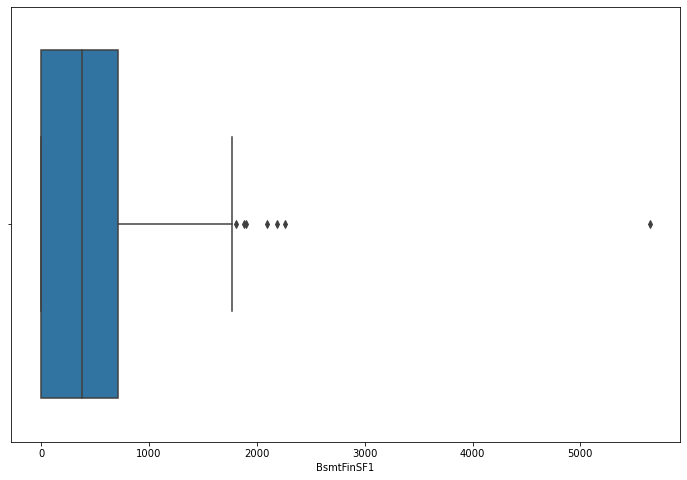

BsmtFinSF2


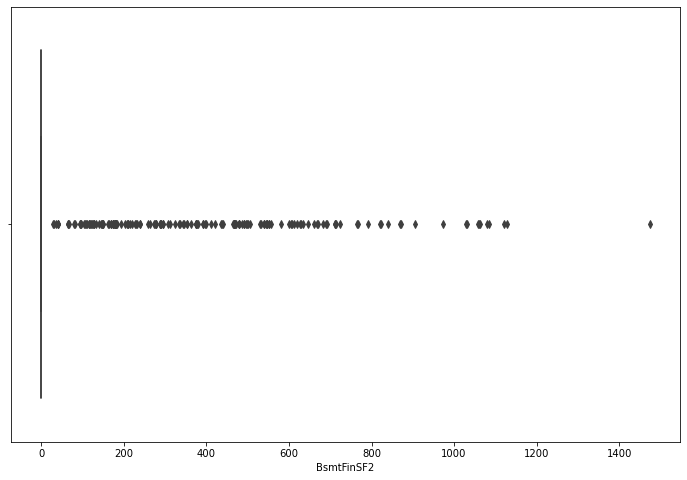

BsmtUnfSF


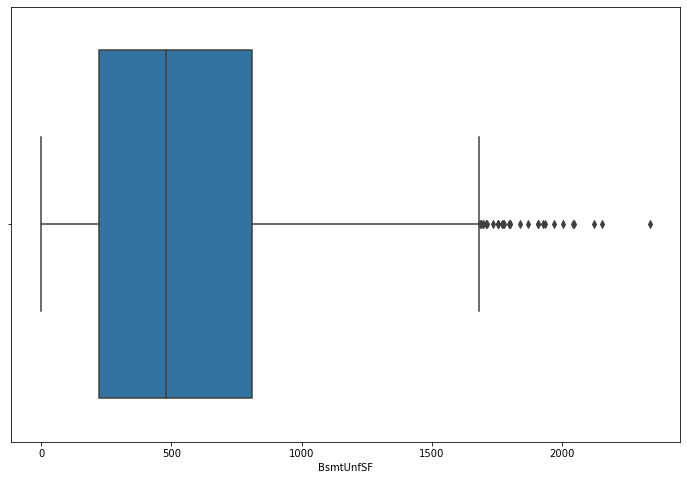

TotalBsmtSF


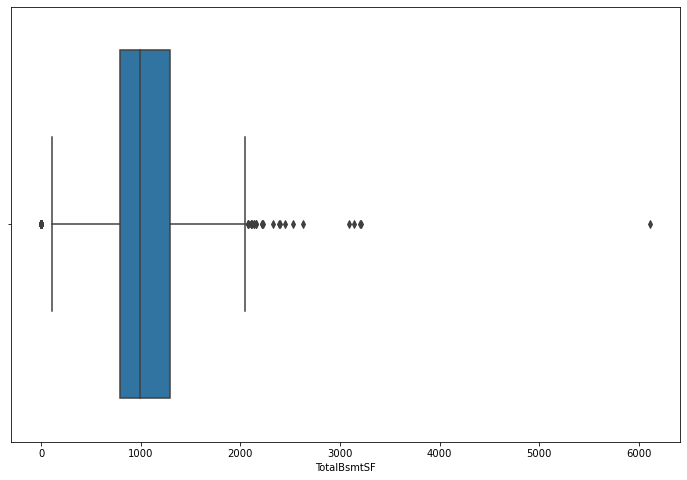

1stFlrSF


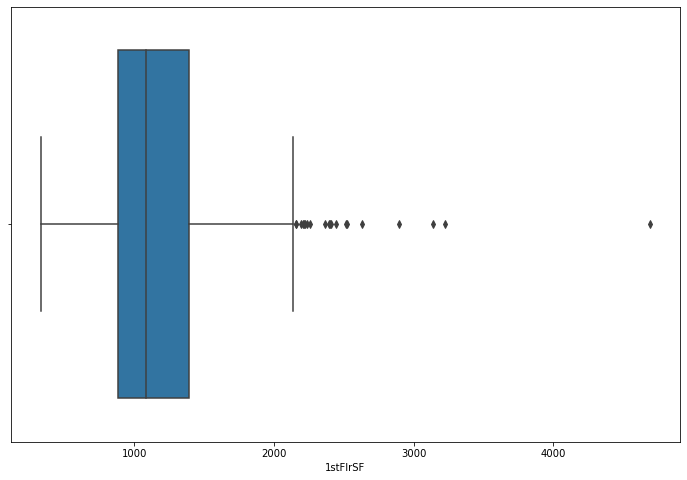

2ndFlrSF


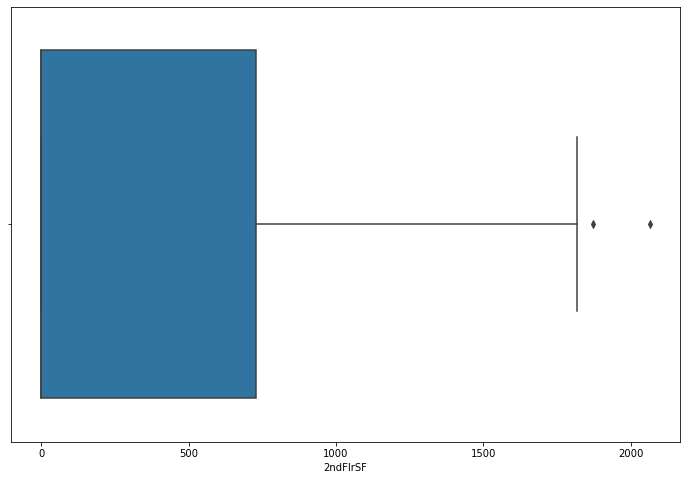

LowQualFinSF


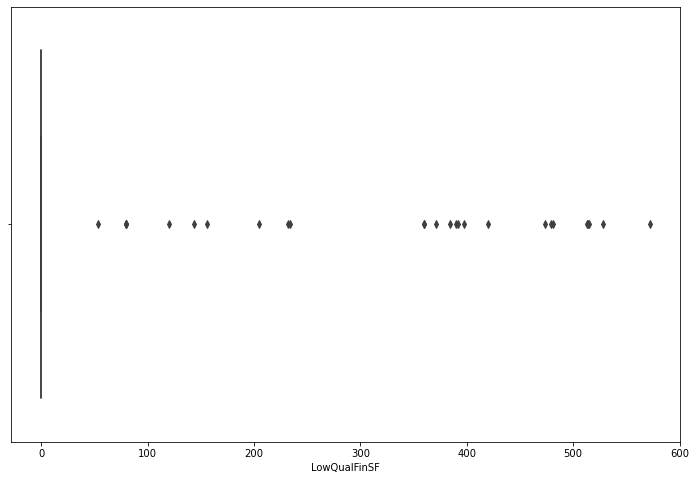

GrLivArea


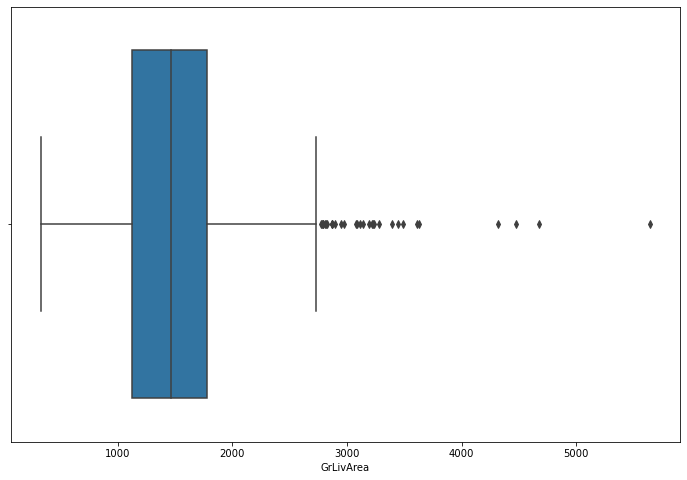

BsmtFullBath


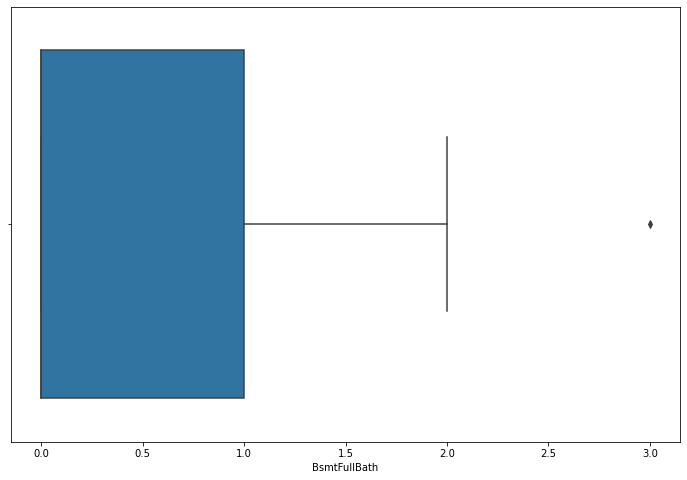

BsmtHalfBath


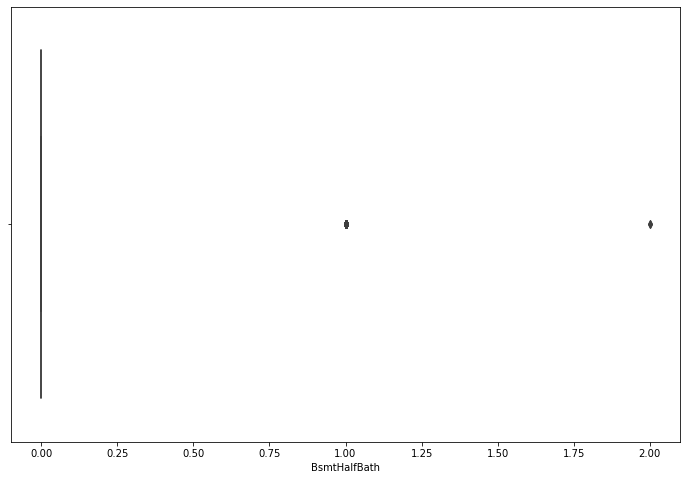

FullBath


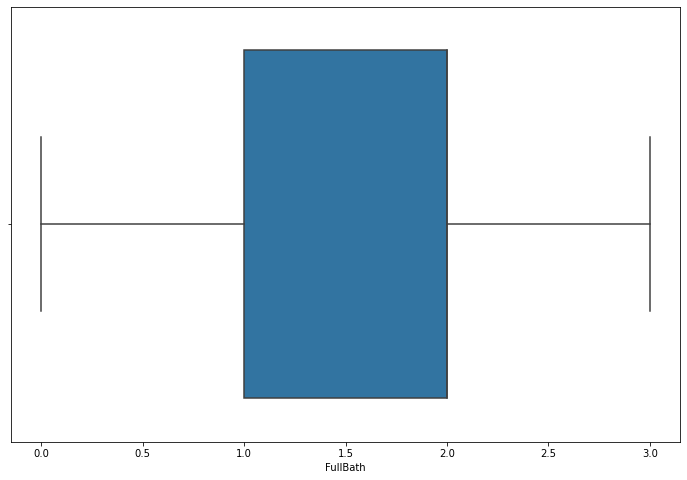

HalfBath


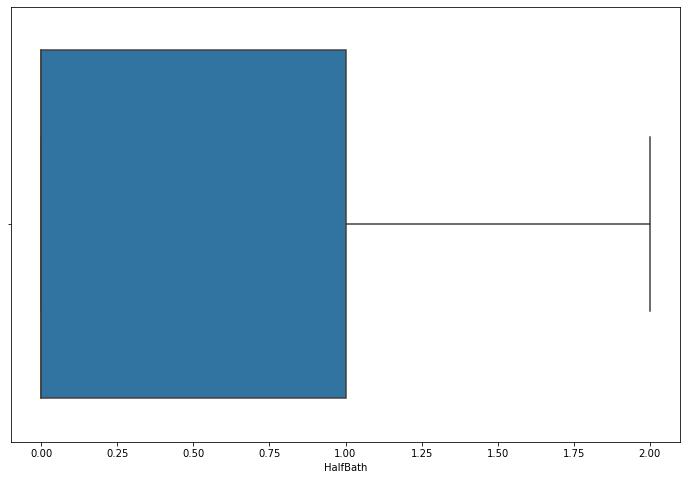

BedroomAbvGr


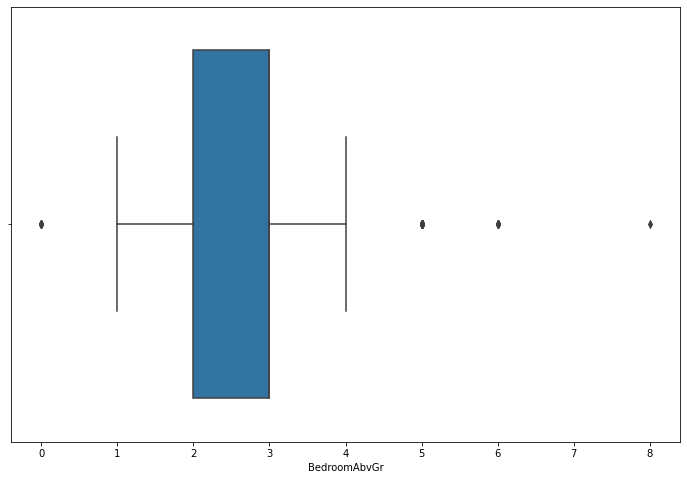

KitchenAbvGr


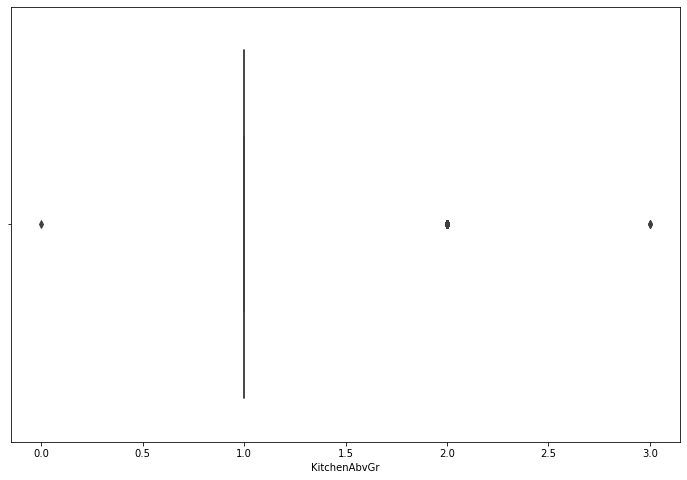

TotRmsAbvGrd


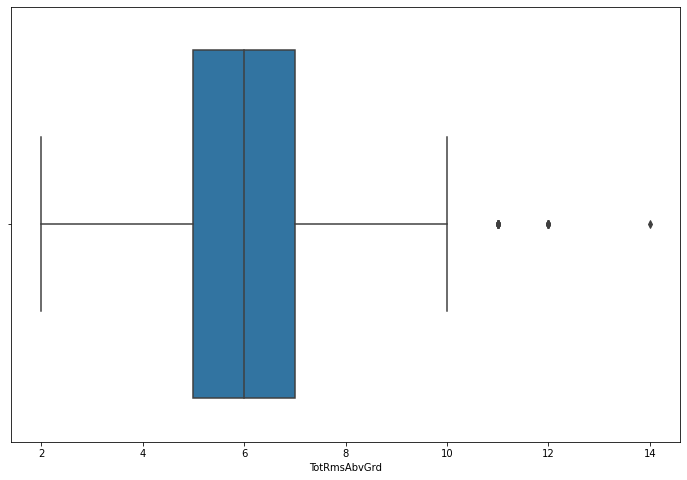

Fireplaces


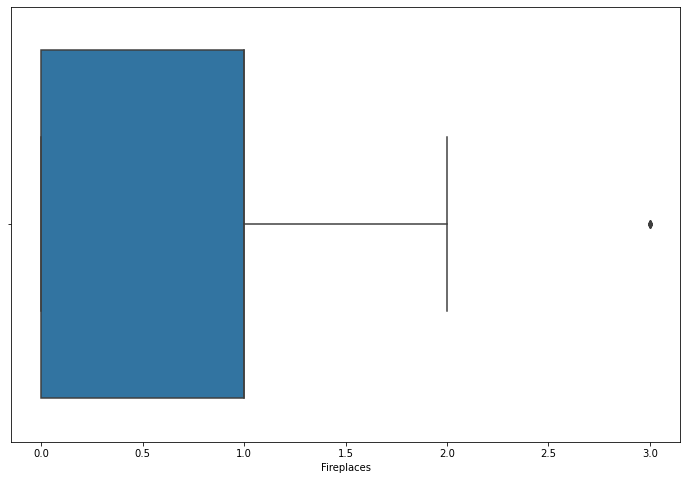

GarageYrBlt


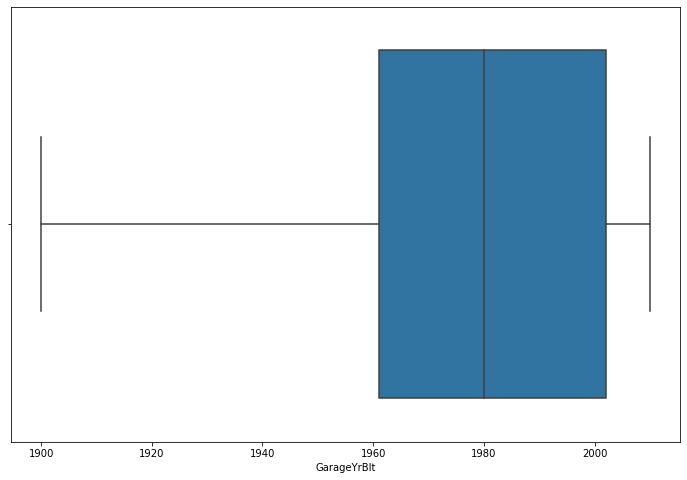

GarageCars


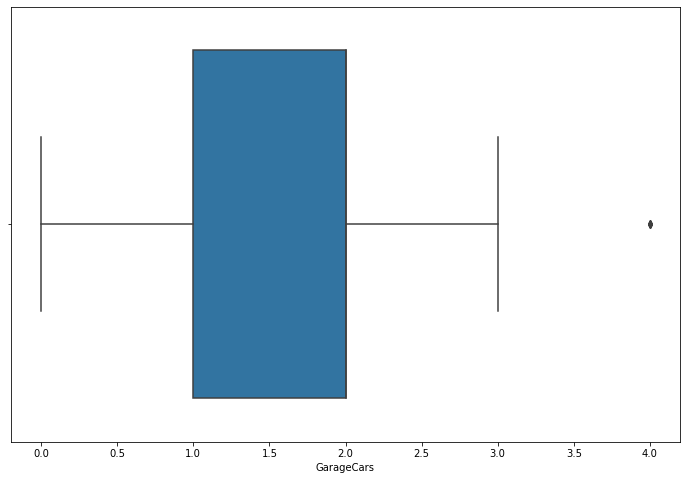

GarageArea


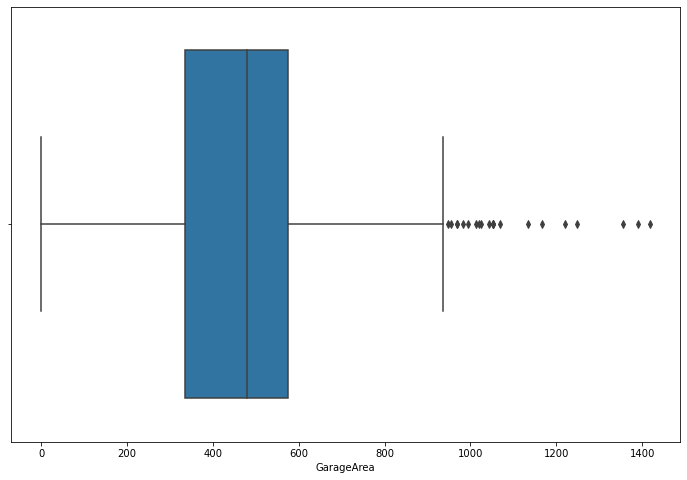

WoodDeckSF


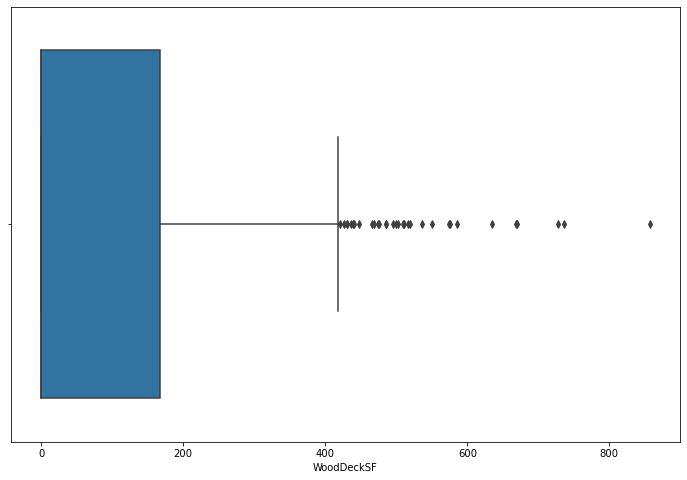

OpenPorchSF


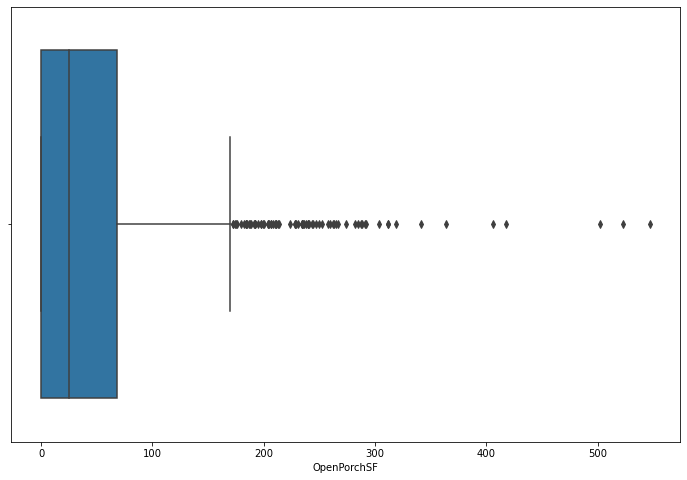

EnclosedPorch


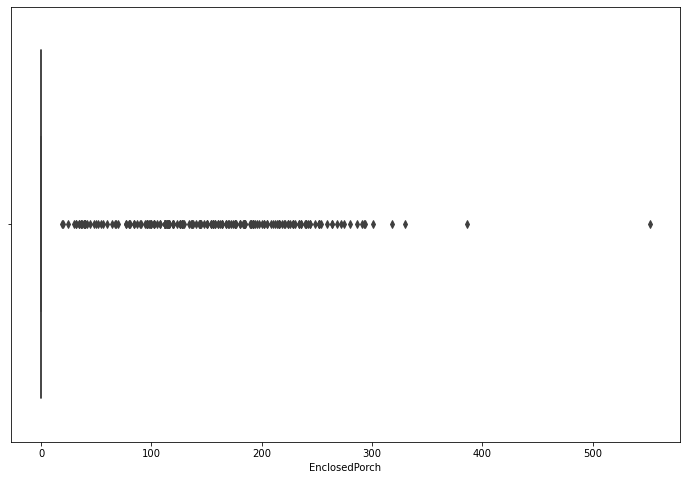

3SsnPorch


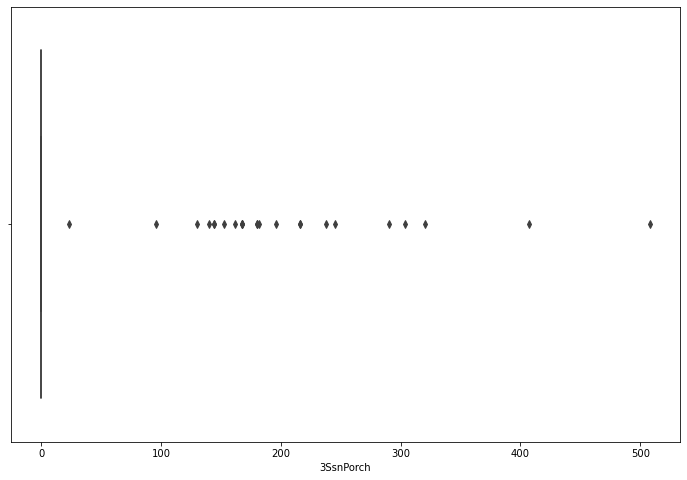

ScreenPorch


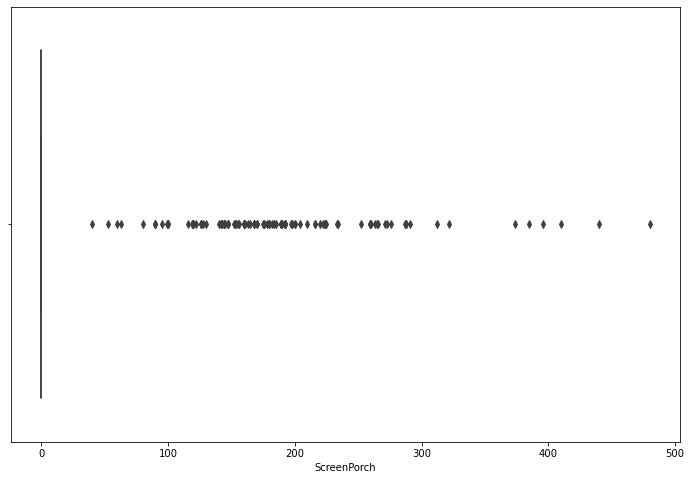

PoolArea


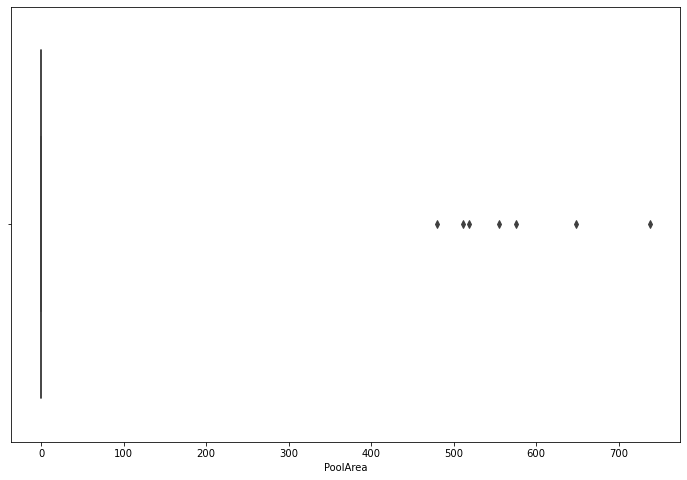

MiscVal


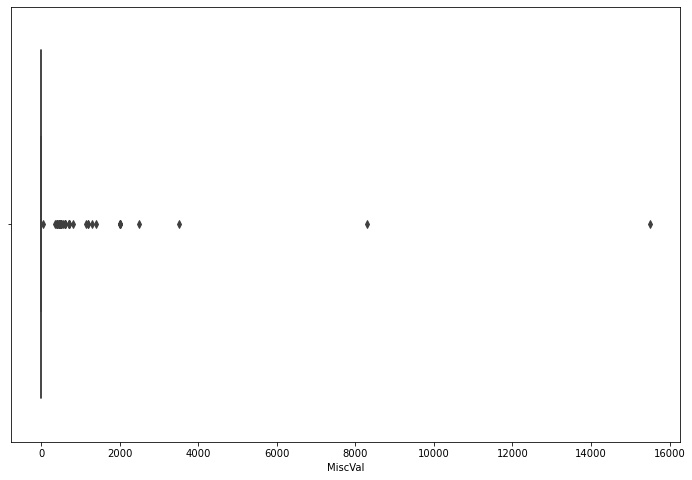

MoSold


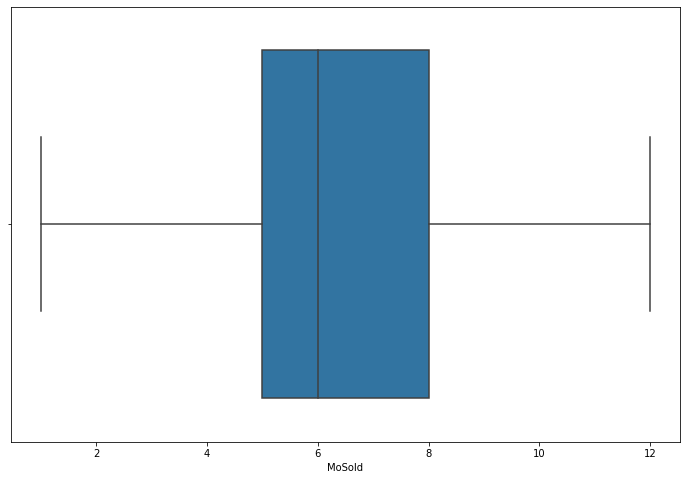

YrSold


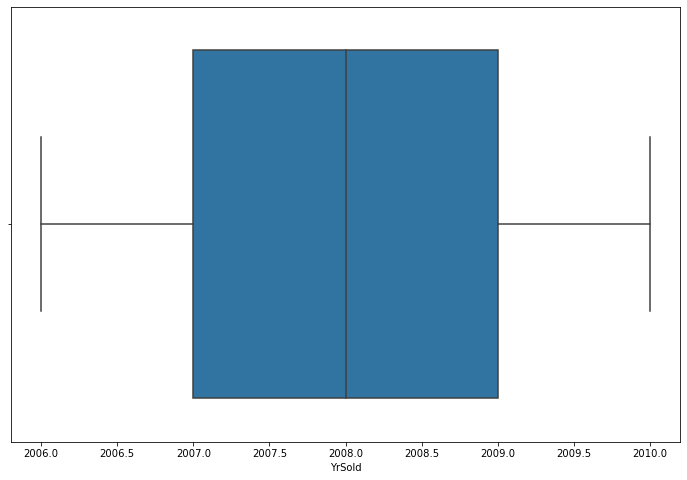

SalePrice


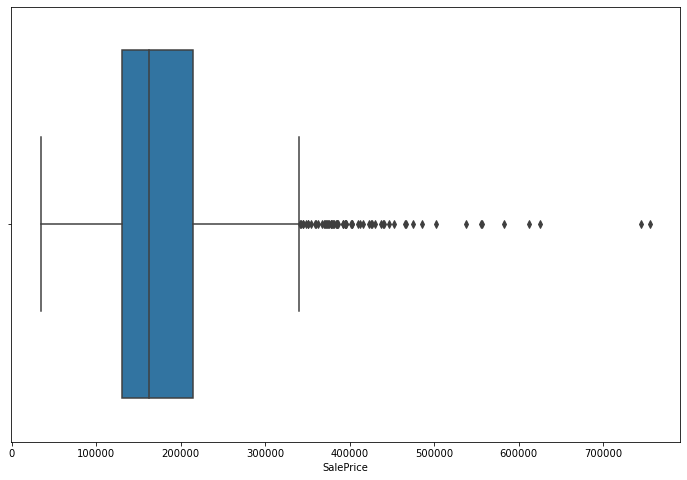

In [20]:
for col in train_num.columns:
    sns.boxplot(x=train_num[col])
    print(col)
    plt.show()

columns with outliers:
    
    1. LotFrontage: right skewed, few outliers present
    2. LotArea: right skewed, few outliers present
    3. YearBuilt: left skewed, few outliers present
    4. MasVnrArea: right skewed, many outliers present
    5. BsmtFinSF1: right skewed, few outliers present
    6. BsmtFinSF2: right skewed, many outliers present (the value is 0 for most) - may not be able to use this variable as a continuous predictor
    7. TotalBsmtSF: right skewed, few outliers present
    8. 1stFlrSF: right skewed, few outliers present
    9. LowQualFinSF: right skewed, few outliers present (the value is 0 for most) - may not be able to use this variable as a continous predictor.
    10. GrLivArea: right skewed, few outliers present
    11. GarageArea: right skewed, few outliers present
    12. WoodDeckSF: heavily right skewed, many outliers present (the value is 0 for most) - may not be able to use this variable as a continous predictor.
    13. OpenPorchSF: heavily right skewed, many outliers present
    14. EnclosedPorch: right skewed, many outliers present (the value is 0 for most) - may not be able to use this variable as a continous predictor.
    15. 3SsnPorch: right skewed, few outliers present (the value is 0 for most) - may not be able to use this variable as a continous predictor.
    16. ScreenPorch: right skewed, few outliers present (the value is 0 for most) - may not be able to use this variable as a continous predictor.
    17. PoolArea: right skewed, few outliers present (the value is 0 for most) - may not be able to use this variable as a continous predictor.
    18. MiscVal: right skewed, few outliers present (the value is 0 for most) - may not be able to use this variable as a continous predictor.
    19. SalePrice: Target variable, many outliers present. 

In [21]:
col_outliers = ['LotFrontage', 'LotArea', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 
               'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

### Trying to answer 2 questions now:
   
    1. Does outlier treatment result in better predictions?
    2. Do log transformations of heavily skewed variables result in better predictions?

Exploration 1: Outlier Treatment

In [22]:
def remove_outlier_iqr(X, y, factor):
    
    df_outlier_cols = train_full[col_outliers]
    
    # obtain the first quartile
    Q1 = df_outlier_cols.quantile(0.25)

    # obtain the third quartile
    Q3 = df_outlier_cols.quantile(0.75)

    # obtain the IQR
    IQR = Q3 - Q1

    # print the IQR
    print(IQR)
    
    #print('Removing any datapoints that are more than +/-{factor} times the IQR'.format(factor)
        
    df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
    y_iqr_removed = y[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
        
    return df_iqr_removed, y_iqr_removed

In [29]:
train_full = pd.concat([train_numeric, train_cat_enc], axis=1)
response = train['SalePrice']

In [30]:
factor_iqr = np.arange(1, 4.1, 0.05)
train_rmse = []
test_rmse = []

for factor in factor_iqr:

    kf = KFold(n_splits=20, shuffle=True, random_state=42)
    
    # initializing the CV train and test scores' list
    train_scores = []
    test_scores = []
    X = train_full.copy()
    
    # inner loop for CV:
    for train_index, test_index in kf.split(X):
        
        # make a copy of the training data
        X = train_full.copy()
       
        y = response.copy()
        
        # split the data into train and test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        # remove outliers from the train set depending on the factor in the list
        X_train, y_train = remove_outlier_iqr(X_train, y_train, factor)
        print('For', factor, ' shape of train is:')
        print('Shape of X_train', X_train.shape)
    
        # fit Linear model using the train data
        lr_outliers = LinearRegression()
        lr_outliers.fit(X_train, y_train)
    
        # calc train and test preds and rmse
        y_train_preds = lr_outliers.predict(X_train)
        y_train_mse = mean_squared_error(y_train, y_train_preds)

        y_test_preds = lr_outliers.predict(X_test)
        y_test_mse = mean_squared_error(y_test, y_test_preds)
        
        train_scores.append(np.sqrt(y_train_mse))
        test_scores.append(np.sqrt(y_test_mse))
    
    train_rmse.append(train_scores)
    test_rmse.append(test_scores)

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (677, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (680, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (676, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
Total

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (678, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (680, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (676, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
Total

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (686, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (690, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.0  shape of train is:
Shape of X_train (682, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
Total

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.05  shape of train is:
Shape of X_train (693, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.05  shape of train is:
Shape of X_train (696, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.05  shape of train is:
Shape of X_train (692, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
To

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.05  shape of train is:
Shape of X_train (704, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.05  shape of train is:
Shape of X_train (700, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.05  shape of train is:
Shape of X_train (704, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
To

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1  shape of train is:
Shape of X_train (730, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1  shape of train is:
Shape of X_train (725, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1  shape of train is:
Shape of X_train (730, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
Total

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1  shape of train is:
Shape of X_train (730, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1  shape of train is:
Shape of X_train (729, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1  shape of train is:
Shape of X_train (735, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
Total

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1  shape of train is:
Shape of X_train (730, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1500000000000001  shape of train is:
Shape of X_train (905, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1500000000000001  shape of train is:
Shape of X_train (905, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.0

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1500000000000001  shape of train is:
Shape of X_train (902, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1500000000000001  shape of train is:
Shape of X_train (908, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1500000000000001  shape of train is:
Shape of X_train (901, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1500000000000001  shape of train is:
Shape of X_train (905, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1500000000000001  shape of train is:
Shape of X_train (907, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.1500000000000001  shape of train is:
Shape of X_train (906, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 1.2000000000000002  shape of train is:
Shape of X_train (925, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2000000000000002  shape of train is:
Shape of X_train (926, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2000000000000002  shape of train is:
Shape of X_train (926, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2000000000000002  shape of train is:
Shape of 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2000000000000002  shape of train is:
Shape of X_train (931, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2000000000000002  shape of train is:
Shape of X_train (930, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2000000000000002  shape of train is:
Shape of X_train (930, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2500000000000002  shape of train is:
Shape of X_train (967, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2500000000000002  shape of train is:
Shape of X_train (966, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2500000000000002  shape of train is:
Shape of X_train (968, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2500000000000002  shape of train is:
Shape of X_train (970, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2500000000000002  shape of train is:
Shape of X_train (977, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.2500000000000002  shape of train is:
Shape of X_train (976, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3000000000000003  shape of train is:
Shape of X_train (992, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3000000000000003  shape of train is:
Shape of X_train (994, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3000000000000003  shape of train is:
Shape of X_train (995, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3000000000000003  shape of train is:
Shape of X_train (997, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3000000000000003  shape of train is:
Shape of X_train (989, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3000000000000003  shape of train is:
Shape of X_train (992, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3000000000000003  shape of train is:
Shape of X_train (986, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3000000000000003  shape of train is:
Shape of X_train (995, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3500000000000003  shape of train is:
Shape of X_train (1020, 230)
LotFrontage      37.00
LotArea        4048.00
YearB

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3500000000000003  shape of train is:
Shape of X_train (1019, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3500000000000003  shape of train is:
Shape of X_train (1021, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3500000000000003  shape of train is:
Shape of X_train (1024, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 1.3500000000000003  shape of train is:
Shape of X_train (1021, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3500000000000003  shape of train is:
Shape of X_train (1026, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3500000000000003  shape of train is:
Shape of X_train (1016, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.3500000000000003  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 1.4000000000000004  shape of train is:
Shape of X_train (1105, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4000000000000004  shape of train is:
Shape of X_train (1103, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4000000000000004  shape of train is:
Shape of X_train (1104, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4000000000000004  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4000000000000004  shape of train is:
Shape of X_train (1108, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4000000000000004  shape of train is:
Shape of X_train (1106, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4000000000000004  shape of train is:
Shape of X_train (1106, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4500000000000004  shape of train is:
Shape of X_train (1118, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4500000000000004  shape of train is:
Shape of X_train (1117, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4500000000000004  shape of train is:
Shape of X_train (1120, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4500000000000004  shape of train is:
Shape of X_train (1124, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4500000000000004  shape of train is:
Shape of X_train (1121, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.4500000000000004  shape of train is:
Shape of X_train (1121, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 1.5000000000000004  shape of train is:
Shape of X_train (1154, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5000000000000004  shape of train is:
Shape of X_train (1148, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5000000000000004  shape of train is:
Shape of X_train (1149, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5000000000000004  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 1.5000000000000004  shape of train is:
Shape of X_train (1150, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5000000000000004  shape of train is:
Shape of X_train (1152, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5000000000000004  shape of train is:
Shape of X_train (1156, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5000000000000004  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5000000000000004  shape of train is:
Shape of X_train (1155, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1161, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1164, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1163, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1161, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1160, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1163, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1157, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.5500000000000005  shape of train is:
Shape of X_train (1165, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6000000000000005  shape of train is:
Shape of X_train (1207, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6000000000000005  shape of train is:
Shape of X_train (1203, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6000000000000005  shape of train is:
Shape of X_train (1206, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6000000000000005  shape of train is:
Shape of X_train (1209, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6000000000000005  shape of train is:
Shape of X_train (1204, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6000000000000005  shape of train is:
Shape of X_train (1203, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6000000000000005  shape of train is:
Shape of X_train (1207, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6000000000000005  shape of train is:
Shape of X_train (1199, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6000000000000005  shape of train is:
Shape of X_train (1208, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 1.6500000000000006  shape of train is:
Shape of X_train (1212, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6500000000000006  shape of train is:
Shape of X_train (1217, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6500000000000006  shape of train is:
Shape of X_train (1216, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6500000000000006  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6500000000000006  shape of train is:
Shape of X_train (1217, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6500000000000006  shape of train is:
Shape of X_train (1212, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.6500000000000006  shape of train is:
Shape of X_train (1212, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7000000000000006  shape of train is:
Shape of X_train (1217, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7000000000000006  shape of train is:
Shape of X_train (1221, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7000000000000006  shape of train is:
Shape of X_train (1215, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 1.7000000000000006  shape of train is:
Shape of X_train (1217, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7000000000000006  shape of train is:
Shape of X_train (1219, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7000000000000006  shape of train is:
Shape of X_train (1220, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7000000000000006  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7000000000000006  shape of train is:
Shape of X_train (1222, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7500000000000007  shape of train is:
Shape of X_train (1225, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7500000000000007  shape of train is:
Shape of X_train (1229, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 1.7500000000000007  shape of train is:
Shape of X_train (1229, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7500000000000007  shape of train is:
Shape of X_train (1225, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7500000000000007  shape of train is:
Shape of X_train (1227, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7500000000000007  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7500000000000007  shape of train is:
Shape of X_train (1228, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7500000000000007  shape of train is:
Shape of X_train (1222, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.7500000000000007  shape of train is:
Shape of X_train (1230, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8000000000000007  shape of train is:
Shape of X_train (1230, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8000000000000007  shape of train is:
Shape of X_train (1235, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8000000000000007  shape of train is:
Shape of X_train (1235, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8000000000000007  shape of train is:
Shape of X_train (1234, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8000000000000007  shape of train is:
Shape of X_train (1235, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8000000000000007  shape of train is:
Shape of X_train (1231, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8000000000000007  shape of train is:
Shape of X_train (1233, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8000000000000007  shape of train is:
Shape of X_train (1228, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8000000000000007  shape of train is:
Shape of X_train (1236, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8500000000000008  shape of train is:
Shape of X_train (1239, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8500000000000008  shape of train is:
Shape of X_train (1242, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8500000000000008  shape of train is:
Shape of X_train (1243, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8500000000000008  shape of train is:
Shape of X_train (1243, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8500000000000008  shape of train is:
Shape of X_train (1243, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8500000000000008  shape of train is:
Shape of X_train (1240, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.8500000000000008  shape of train is:
Shape of X_train (1244, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9000000000000008  shape of train is:
Shape of X_train (1244, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9000000000000008  shape of train is:
Shape of X_train (1247, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9000000000000008  shape of train is:
Shape of X_train (1247, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9000000000000008  shape of train is:
Shape of X_train (1244, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9000000000000008  shape of train is:
Shape of X_train (1246, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 1.9000000000000008  shape of train is:
Shape of X_train (1247, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9000000000000008  shape of train is:
Shape of X_train (1244, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9000000000000008  shape of train is:
Shape of X_train (1246, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9000000000000008  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 1.9500000000000008  shape of train is:
Shape of X_train (1251, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9500000000000008  shape of train is:
Shape of X_train (1254, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9500000000000008  shape of train is:
Shape of X_train (1255, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9500000000000008  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9500000000000008  shape of train is:
Shape of X_train (1252, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9500000000000008  shape of train is:
Shape of X_train (1252, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 1.9500000000000008  shape of train is:
Shape of X_train (1254, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.000000000000001  shape of train is:
Shape of X_train (1259, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.000000000000001  shape of train is:
Shape of X_train (1258, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.000000000000001  shape of train is:
Shape of X_train (1256, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.000000000000001  shape of train is:
Shape of X_train (1261, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.000000000000001  shape of train is:
Shape of X_train (1260, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.000000000000001  shape of train is:
Shape of X_train (1262, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.000000000000001  shape of train is:
Shape of X_train (1261, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.0500000000000007  shape of train is:
Shape of X_train (1266, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.0500000000000007  shape of train is:
Shape of X_train (1267, 230)
LotFrontage      37.00
LotArea        4048.00
Year

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.0500000000000007  shape of train is:
Shape of X_train (1267, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.0500000000000007  shape of train is:
Shape of X_train (1267, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.0500000000000007  shape of train is:
Shape of X_train (1268, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.0500000000000007  shape of train is:
Shape of X_train (1267, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.0500000000000007  shape of train is:
Shape of X_train (1269, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.0500000000000007  shape of train is:
Shape of X_train (1264, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.100000000000001  shape of train is:
Shape of X_train (1269, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.100000000000001  shape of train is:
Shape of X_train (1270, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.100000000000001  shape of train is:
Shape of X_train (1274, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.100000000000001  shape of train is:
Shape of X_train (1274, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.100000000000001  shape of train is:
Shape of X_train (1273, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.100000000000001  shape of train is:
Shape of X_train (1273, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.1500000000000012  shape of train is:
Shape of X_train (1276, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.1500000000000012  shape of train is:
Shape of X_train (1276, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.1500000000000012  shape of train is:
Shape of X_train (1274, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.1500000000000012  shape of train is:
Shape of X_train (1278, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.1500000000000012  shape of train is:
Shape of X_train (1278, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.1500000000000012  shape of train is:
Shape of X_train (1279, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.1500000000000012  shape of train is:
Shape of X_train (1273, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.1500000000000012  shape of train is:
Shape of X_train (1279, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.200000000000001  shape of train is:
Shape of X_train (1280, 230)
LotFrontage      37.00
LotArea        4048.00
Year

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.200000000000001  shape of train is:
Shape of X_train (1282, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.200000000000001  shape of train is:
Shape of X_train (1278, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.200000000000001  shape of train is:
Shape of X_train (1279, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.200000000000001  shape of train is:
Shape of X_train (1282, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.200000000000001  shape of train is:
Shape of X_train (1283, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.200000000000001  shape of train is:
Shape of X_train (1280, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.250000000000001  shape of train is:
Shape of X_train (1280, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.250000000000001  shape of train is:
Shape of X_train (1281, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.250000000000001  shape of train is:
Shape of X_train (1283, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.250000000000001  shape of train is:
Shape of X_train (1285, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.250000000000001  shape of train is:
Shape of X_train (1284, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.250000000000001  shape of train is:
Shape of X_train (1284, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.300000000000001  shape of train is:
Shape of X_train (1285, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.300000000000001  shape of train is:
Shape of X_train (1285, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.300000000000001  shape of train is:
Shape of X_train (1283, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.300000000000001  shape of train is:
Shape of X_train (1285, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.300000000000001  shape of train is:
Shape of X_train (1286, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.300000000000001  shape of train is:
Shape of X_train (1288, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.300000000000001  shape of train is:
Shape of X_train (1288, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.3500000000000014  shape of train is:
Shape of X_train (1286, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.3500000000000014  shape of train is:
Shape of X_train (1286, 230)
LotFrontage      37.00
LotArea        4048.00
Year

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.3500000000000014  shape of train is:
Shape of X_train (1285, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.3500000000000014  shape of train is:
Shape of X_train (1286, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.3500000000000014  shape of train is:
Shape of X_train (1286, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.3500000000000014  shape of train is:
Shape of X_train (1288, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.3500000000000014  shape of train is:
Shape of X_train (1283, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.3500000000000014  shape of train is:
Shape of X_train (1289, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.4000000000000012  shape of train is:
Shape of X_train (1290, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.4000000000000012  shape of train is:
Shape of X_train (1287, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.4000000000000012  shape of train is:
Shape of X_train (1289, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.4000000000000012  shape of train is:
Shape of X_train (1291, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.4000000000000012  shape of train is:
Shape of X_train (1292, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.4000000000000012  shape of train is:
Shape of X_train (1293, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.450000000000001  shape of train is:
Shape of X_train (1298, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.450000000000001  shape of train is:
Shape of X_train (1295, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.450000000000001  shape of train is:
Shape of X_train (1295, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.450000000000001  shape of train is:
Shape of X_train (1299, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.450000000000001  shape of train is:
Shape of X_train (1300, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.450000000000001  shape of train is:
Shape of X_train (1298, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 2.5000000000000013  shape of train is:
Shape of X_train (1302, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5000000000000013  shape of train is:
Shape of X_train (1302, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5000000000000013  shape of train is:
Shape of X_train (1302, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5000000000000013  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 2.5000000000000013  shape of train is:
Shape of X_train (1301, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5000000000000013  shape of train is:
Shape of X_train (1301, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5000000000000013  shape of train is:
Shape of X_train (1303, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5000000000000013  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5000000000000013  shape of train is:
Shape of X_train (1298, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5000000000000013  shape of train is:
Shape of X_train (1303, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5500000000000016  shape of train is:
Shape of X_train (1309, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 2.5500000000000016  shape of train is:
Shape of X_train (1307, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5500000000000016  shape of train is:
Shape of X_train (1308, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5500000000000016  shape of train is:
Shape of X_train (1309, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5500000000000016  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5500000000000016  shape of train is:
Shape of X_train (1310, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5500000000000016  shape of train is:
Shape of X_train (1310, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.5500000000000016  shape of train is:
Shape of X_train (1305, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6000000000000014  shape of train is:
Shape of X_train (1314, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6000000000000014  shape of train is:
Shape of X_train (1313, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6000000000000014  shape of train is:
Shape of X_train (1312, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6000000000000014  shape of train is:
Shape of X_train (1316, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6000000000000014  shape of train is:
Shape of X_train (1316, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6000000000000014  shape of train is:
Shape of X_train (1315, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6500000000000012  shape of train is:
Shape of X_train (1312, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6500000000000012  shape of train is:
Shape of X_train (1313, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6500000000000012  shape of train is:
Shape of X_train (1315, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6500000000000012  shape of train is:
Shape of X_train (1317, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6500000000000012  shape of train is:
Shape of X_train (1318, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.6500000000000012  shape of train is:
Shape of X_train (1315, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7000000000000015  shape of train is:
Shape of X_train (1320, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7000000000000015  shape of train is:
Shape of X_train (1319, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7000000000000015  shape of train is:
Shape of X_train (1320, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 2.7000000000000015  shape of train is:
Shape of X_train (1320, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7000000000000015  shape of train is:
Shape of X_train (1320, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7000000000000015  shape of train is:
Shape of X_train (1322, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7000000000000015  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7000000000000015  shape of train is:
Shape of X_train (1316, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7000000000000015  shape of train is:
Shape of X_train (1320, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7500000000000018  shape of train is:
Shape of X_train (1321, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7500000000000018  shape of train is:
Shape of X_train (1319, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7500000000000018  shape of train is:
Shape of X_train (1319, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7500000000000018  shape of train is:
Shape of X_train (1321, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7500000000000018  shape of train is:
Shape of X_train (1321, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7500000000000018  shape of train is:
Shape of X_train (1321, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.7500000000000018  shape of train is:
Shape of X_train (1317, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8000000000000016  shape of train is:
Shape of X_train (1325, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8000000000000016  shape of train is:
Shape of X_train (1323, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8000000000000016  shape of train is:
Shape of X_train (1323, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8000000000000016  shape of train is:
Shape of X_train (1326, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8000000000000016  shape of train is:
Shape of X_train (1323, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8000000000000016  shape of train is:
Shape of X_train (1327, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8500000000000014  shape of train is:
Shape of X_train (1325, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8500000000000014  shape of train is:
Shape of X_train (1326, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8500000000000014  shape of train is:
Shape of X_train (1323, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8500000000000014  shape of train is:
Shape of X_train (1326, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8500000000000014  shape of train is:
Shape of X_train (1328, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8500000000000014  shape of train is:
Shape of X_train (1326, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.8500000000000014  shape of train is:
Shape of X_train (1326, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.9000000000000017  shape of train is:
Shape of X_train (1328, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.9000000000000017  shape of train is:
Shape of X_train (1328, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.9000000000000017  shape of train is:
Shape of X_train (1327, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.9000000000000017  shape of train is:
Shape of X_train (1328, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.9000000000000017  shape of train is:
Shape of X_train (1329, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.9000000000000017  shape of train is:
Shape of X_train (1329, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.9000000000000017  shape of train is:
Shape of X_train (1325, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.9000000000000017  shape of train is:
Shape of X_train (1328, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.950000000000002  shape of train is:
Shape of X_train (1328, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.950000000000002  shape of train is:
Shape of X_train (1328, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.950000000000002  shape of train is:
Shape of X_train (1328, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.950000000000002  shape of train is:
Shape of X_train (1330, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.950000000000002  shape of train is:
Shape of X_train (1330, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 2.950000000000002  shape of train is:
Shape of X_train (1330, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0000000000000018  shape of train is:
Shape of X_train (1331, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0000000000000018  shape of train is:
Shape of X_train (1332, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0000000000000018  shape of train is:
Shape of X_train (1331, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0000000000000018  shape of train is:
Shape of X_train (1331, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0000000000000018  shape of train is:
Shape of X_train (1335, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0000000000000018  shape of train is:
Shape of X_train (1333, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0500000000000016  shape of train is:
Shape of X_train (1334, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0500000000000016  shape of train is:
Shape of X_train (1331, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0500000000000016  shape of train is:
Shape of X_train (1332, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0500000000000016  shape of train is:
Shape of X_train (1333, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0500000000000016  shape of train is:
Shape of X_train (1333, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0500000000000016  shape of train is:
Shape of X_train (1335, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0500000000000016  shape of train is:
Shape of X_train (1330, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.0500000000000016  shape of train is:
Shape of X_train (1333, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.100000000000002  shape of train is:
Shape of X_train (1332, 230)
LotFrontage      37.00
LotArea        4048.00
Year

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.100000000000002  shape of train is:
Shape of X_train (1332, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.100000000000002  shape of train is:
Shape of X_train (1333, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.100000000000002  shape of train is:
Shape of X_train (1334, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.100000000000002  shape of train is:
Shape of X_train (1335, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.100000000000002  shape of train is:
Shape of X_train (1335, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.100000000000002  shape of train is:
Shape of X_train (1331, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.150000000000002  shape of train is:
Shape of X_train (1335, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.150000000000002  shape of train is:
Shape of X_train (1334, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.150000000000002  shape of train is:
Shape of X_train (1333, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.150000000000002  shape of train is:
Shape of X_train (1338, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.150000000000002  shape of train is:
Shape of X_train (1335, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.150000000000002  shape of train is:
Shape of X_train (1336, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.200000000000002  shape of train is:
Shape of X_train (1334, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.200000000000002  shape of train is:
Shape of X_train (1335, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.200000000000002  shape of train is:
Shape of X_train (1336, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.200000000000002  shape of train is:
Shape of X_train (1336, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.200000000000002  shape of train is:
Shape of X_train (1335, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.200000000000002  shape of train is:
Shape of X_train (1339, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.2500000000000018  shape of train is:
Shape of X_train (1339, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.2500000000000018  shape of train is:
Shape of X_train (1339, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.2500000000000018  shape of train is:
Shape of X_train (1337, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.2500000000000018  shape of train is:
Shape of X_train (1339, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.2500000000000018  shape of train is:
Shape of X_train (1340, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.2500000000000018  shape of train is:
Shape of X_train (1339, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.2500000000000018  shape of train is:
Shape of X_train (1339, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.300000000000002  shape of train is:
Shape of X_train (1338, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.300000000000002  shape of train is:
Shape of X_train (1340, 230)
LotFrontage      37.00
LotArea        4048.00
YearB

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.300000000000002  shape of train is:
Shape of X_train (1339, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.300000000000002  shape of train is:
Shape of X_train (1340, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.300000000000002  shape of train is:
Shape of X_train (1340, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.300000000000002  shape of train is:
Shape of X_train (1339, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.300000000000002  shape of train is:
Shape of X_train (1341, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.300000000000002  shape of train is:
Shape of X_train (1341, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 3.3500000000000023  shape of train is:
Shape of X_train (1340, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.3500000000000023  shape of train is:
Shape of X_train (1342, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.3500000000000023  shape of train is:
Shape of X_train (1342, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.3500000000000023  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.3500000000000023  shape of train is:
Shape of X_train (1344, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.3500000000000023  shape of train is:
Shape of X_train (1343, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.3500000000000023  shape of train is:
Shape of X_train (1342, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.400000000000002  shape of train is:
Shape of X_train (1344, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.400000000000002  shape of train is:
Shape of X_train (1347, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.400000000000002  shape of train is:
Shape of X_train (1347, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.400000000000002  shape of train is:
Shape of X_train (1347, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.400000000000002  shape of train is:
Shape of X_train (1346, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.400000000000002  shape of train is:
Shape of X_train (1348, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.400000000000002  shape of train is:
Shape of X_train (1344, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.400000000000002  shape of train is:
Shape of X_train (1347, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.450000000000002  shape of train is:
Shape of X_train (1345, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.450000000000002  shape of train is:
Shape of X_train (1346, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.450000000000002  shape of train is:
Shape of X_train (1346, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.450000000000002  shape of train is:
Shape of X_train (1348, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.500000000000002  shape of train is:
Shape of X_train (1348, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.500000000000002  shape of train is:
Shape of X_train (1347, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.500000000000002  shape of train is:
Shape of X_train (1347, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.500000000000002  shape of train is:
Shape of X_train (1350, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.500000000000002  shape of train is:
Shape of X_train (1348, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.500000000000002  shape of train is:
Shape of X_train (1349, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.5500000000000025  shape of train is:
Shape of X_train (1346, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.5500000000000025  shape of train is:
Shape of X_train (1348, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.5500000000000025  shape of train is:
Shape of X_train (1348, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.5500000000000025  shape of train is:
Shape of X_train (1350, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.5500000000000025  shape of train is:
Shape of X_train (1349, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.5500000000000025  shape of train is:
Shape of X_train (1347, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.5500000000000025  shape of train is:
Shape of X_train (1349, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.6000000000000023  shape of train is:
Shape of X_train (1350, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.6000000000000023  shape of train is:
Shape of X_train (1353, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.6000000000000023  shape of train is:
Shape of X_train (1350, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.6000000000000023  shape of train is:
Shape of X_train (1353, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.6000000000000023  shape of train is:
Shape of X_train (1352, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 3.6000000000000023  shape of train is:
Shape of X_train (1352, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.6000000000000023  shape of train is:
Shape of X_train (1352, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.6000000000000023  shape of train is:
Shape of X_train (1350, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.6000000000000023  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X_train (1354, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X_train (1351, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X_train (1353, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X_train (1353, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X_train (1354, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X_train (1353, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 3.650000000000002  shape of train is:
Shape of X_train (1353, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X_train (1353, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X_train (1351, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.650000000000002  shape of train is:
Shape of X

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7000000000000024  shape of train is:
Shape of X_train (1354, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7000000000000024  shape of train is:
Shape of X_train (1354, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7000000000000024  shape of train is:
Shape of X_train (1353, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7000000000000024  shape of train is:
Shape of X_train (1354, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7000000000000024  shape of train is:
Shape of X_train (1355, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7000000000000024  shape of train is:
Shape of X_train (1354, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7000000000000024  shape of train is:
Shape of X_train (1354, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7000000000000024  shape of train is:
Shape of X_train (1354, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7000000000000024  shape of train is:
Shape of X_train (1352, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7500000000000027  shape of train is:
Shape of X_train (1352, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7500000000000027  shape of train is:
Shape of X_train (1354, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7500000000000027  shape of train is:
Shape of X_train (1354, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7500000000000027  shape of train is:
Shape of X_train (1355, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7500000000000027  shape of train is:
Shape of X_train (1354, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.7500000000000027  shape of train is:
Shape of X_train (1353, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8000000000000025  shape of train is:
Shape of X_train (1354, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8000000000000025  shape of train is:
Shape of X_train (1356, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8000000000000025  shape of train is:
Shape of X_train (1357, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8000000000000025  shape of train is:
Shape of X_train (1357, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8000000000000025  shape of train is:
Shape of X_train (1356, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8000000000000025  shape of train is:
Shape of X_train (1357, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8000000000000025  shape of train is:
Shape of X_train (1354, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8000000000000025  shape of train is:
Shape of X_train (1357, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8500000000000023  shape of train is:
Shape of X_train (1354, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 3.8500000000000023  shape of train is:
Shape of X_train (1356, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8500000000000023  shape of train is:
Shape of X_train (1355, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8500000000000023  shape of train is:
Shape of X_train (1355, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8500000000000023  shape of train is:
Shape 

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8500000000000023  shape of train is:
Shape of X_train (1357, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8500000000000023  shape of train is:
Shape of X_train (1355, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.8500000000000023  shape of train is:
Shape of X_train (1356, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.9000000000000026  shape of train is:
Shape of X_train (1357, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.9000000000000026  shape of train is:
Shape of X_train (1354, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.9000000000000026  shape of train is:
Shape of X_train (1356, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.9000000000000026  shape of train is:
Shape of X_train (1357, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.9000000000000026  shape of train is:
Shape of X_train (1356, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.9000000000000026  shape of train is:
Shape of X_train (1355, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.950000000000003  shape of train is:
Shape of X_train (1355, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.950000000000003  shape of train is:
Shape of X_train (1356, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.950000000000003  shape of train is:
Shape of X_train (1358, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.950000000000003  shape of train is:
Shape of X_train (1356, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.950000000000003  shape of train is:
Shape of X_train (1356, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.950000000000003  shape of train is:
Shape of X_train (1355, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

For 3.950000000000003  shape of train is:
Shape of X_train (1358, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.950000000000003  shape of train is:
Shape of X_train (1356, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.950000000000003  shape of train is:
Shape of X_train (1357, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 3.950000000000003  shape of train is:
Shape of X

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.000000000000003  shape of train is:
Shape of X_train (1355, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.000000000000003  shape of train is:
Shape of X_train (1357, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.000000000000003  shape of train is:
Shape of X_train (1357, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.000000000000003  shape of train is:
Shape of X_train (1357, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.000000000000003  shape of train is:
Shape of X_train (1356, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.000000000000003  shape of train is:
Shape of X_train (1358, 230)
LotFrontage      37.00
LotArea        4048.00
YearBu

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.0500000000000025  shape of train is:
Shape of X_train (1357, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.0500000000000025  shape of train is:
Shape of X_train (1359, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.0500000000000025  shape of train is:
Shape of X_train (1356, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.0500000000000025  shape of train is:
Shape of X_train (1356, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.0500000000000025  shape of train is:
Shape of X_train (1359, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.0500000000000025  shape of train is:
Shape of X_train (1357, 230)
LotFrontage      37.00
LotArea        4048.00
Yea

/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iq

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.0500000000000025  shape of train is:
Shape of X_train (1356, 230)
LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
For 4.0500000000000025  shape of train is:
Shape of X_train (1359, 230)


/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]
/var/folders/j3/frcnx0t9109_97925b7r2x_80000gn/T/ipykernel_84950/2418264269.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iqr_removed = X[~((df_outlier_cols < (Q1 - factor * IQR)) | (df_outlier_cols > (Q3 + factor * IQR))).any(axis=1)]


In [181]:
test_generalization_error = [np.mean(x) for x in test_rmse]
test_std_error = [np.std(x, ddof=1) for x in test_rmse]

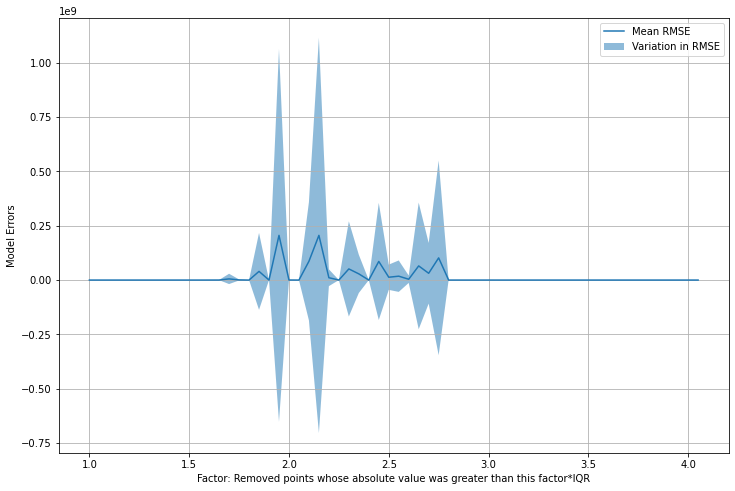

In [182]:
lower_bound = np.array(test_generalization_error) - np.array(test_std_error)
upper_bound = np.array(test_generalization_error) + np.array(test_std_error)

plt.fill_between(x=factor_iqr, y1=lower_bound, y2=upper_bound, alpha=0.5)
plt.plot(factor_iqr, test_generalization_error)
#plt.plot(factor_iqr, test_std_error)
plt.ylabel('Model Errors')
plt.xlabel('Factor: Removed points whose absolute value was greater than this factor*IQR')
plt.legend(['Mean RMSE', 'Variation in RMSE'])
plt.grid(True)
plt.show()

According to the above graph, removing outliers which are above and below the IQR factor increases the model performance.

Wherever very few outliers were removed (to the right), the model rmse is quite high, on the other hand, the model rmse seems to be much lower when datapoints containing outliers are removed.

We will keep the factor at 1.2

In [183]:
# removing outliers from the training data
X_full = train_full.copy()
y = response.copy()

train_full_no_outliers, y_no_outliers = remove_outlier_iqr(X_full, y, 1.7)
print(train_full_no_outliers.shape, y_no_outliers.shape)

LotFrontage      37.00
LotArea        4048.00
YearBuilt        46.00
BsmtFinSF1      712.25
TotalBsmtSF     502.50
1stFlrSF        509.25
GrLivArea       647.25
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64
(1283, 231) (1283,)


Exploration 2: Do log transformations of heavily skewed variables result in better predictions?

In [ ]:
for col in train_full_no_outliers:
    sns.boxplot(x=train_full_no_outliers[col])
    plt.show()

In [ ]:
# We can try log transformation for variables with heavily right skewed distributions

cols_log_trans = ['MasVnrArea', 'OpenPorchSF']

In [ ]:
plt.rcParams['figure.figsize'] = [8, 5]
for col in train_full_no_outliers[cols_log_trans]:
    sns.boxplot(x=train_full_no_outliers[col])
    plt.show()

As all these variables are positive RVs containing a 0 value, we can increase them by 0.5 and then log transform them.

In [ ]:
train_full_log_trans = train_full_no_outliers.copy()

for col in cols_log_trans:
    train_full_log_trans[col] = np.log(np.array(train_full_no_outliers[col]) + 1)
    sns.displot(x=train_full_log_trans[col])
    plt.show()

Both the variables' distributions have been transformed now.

In [ ]:
# linear model with original data

kf = KFold(n_splits=100)

train_scores_no_log = []
train_scores_log = []
test_scores_no_log = []
test_scores_log = []

for train_index, test_index in kf.split(train_full_no_outliers):
    X_train, X_test = train_full_no_outliers.iloc[train_index], train_full_no_outliers.iloc[test_index]
    X_train_log, X_test_log = train_full_log_trans.iloc[train_index], train_full_log_trans.iloc[test_index]
    
    y_train, y_test = y_no_outliers.iloc[train_index], y_no_outliers.iloc[test_index]
    
    # fit Linear model using the non-log train data
    lr_outliers = LinearRegression()
    lr_outliers.fit(X_train, y_train)
    
    # fit Linear model using the log transformed train data
    lr_log = LinearRegression()
    lr_log.fit(X_train_log, y_train)
    
    # calc train and test preds and rmse
    y_train_preds = lr_outliers.predict(X_train)
    y_train_mse = mean_squared_error(y_train, y_train_preds)

    y_test_preds = lr_outliers.predict(X_test)
    y_test_mse = mean_squared_error(y_test, y_test_preds)
    
    y_test_preds_log = lr_log.predict(X_test_log)
    y_test_mse_log = mean_squared_error(y_test, y_test_preds_log)
        
    train_scores.append(np.sqrt(y_train_mse))
    test_scores_no_log.append(np.sqrt(y_test_mse))
    test_scores_log.append(np.sqrt(y_test_mse_log)) 

In [ ]:
print('Mean RMSE for test data without log transformation: ', np.mean(test_scores_no_log))
print('Standard deviation for test data without log transformation: ', np.std(test_scores_no_log, ddof=1))

print('Mean RMSE for test data with log transformation: ', np.mean(test_scores_log))
print('Standard deviation for test data with log transformation: ', np.std(test_scores_log, ddof=1))

We see that the log transformed data has a slightly higher mean error and variance error. 

We will be using the non transformed data for our final model.

## Base Model - Full model, No transformations

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from scipy.stats import jarque_bera

In [50]:
X_train, X_test, y_train, y_test = train_test_split(train_full_no_outliers, y_no_outliers, 
                                                    random_state=42, test_size=0.3)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (898, 230)
X_test : (385, 230)
y_train : (898,)
y_test : (385,)


In [51]:
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_hat_train = base_model.predict(X_train)

In [52]:
model_performance = pd.DataFrame(columns=['algo_name', 'adj_r2_train', 'adj_r2_test', 'Num. Features', 
                                          'rmse_train', 'rmse_test', 'variance_error', 'jb_resid'])

def calc_var_bias_errors(model, X, y):
    kf = KFold(n_splits=5)
    
    scores = cross_val_score(estimator=model, X=X, y=y, cv=kf, scoring='neg_root_mean_squared_error')
    
    bias_error = np.mean(abs(scores))
    variance_error = np.std(abs(scores), ddof=1)
    
    return bias_error, variance_error
    
def calc_r2(model, X, y):
    y_hat = model.predict(X)
    y_bar = y.mean()

    SSR = ((y_hat - y_bar)**2).sum()
    SST = ((y - y_bar)**2).sum()
    r2 = SSR/SST 
    
    return r2

def calc_adj_r2(r2, n, k):
    adj_r2 = 1 - ((1-r2)*(n-1)/(n-k-1))
    
    return adj_r2

def add_model_row(algo_name, adj_r2_train, adj_r2_test, k, rmse_train, rmse_test, variance_error, jb_resid):
    global model_performance
    
    model_scores = pd.Series(data=[algo_name, adj_r2_train, adj_r2_test, k, rmse_train, 
                                   rmse_test, variance_error, jb_resid], 
                             index=['algo_name', 'adj_r2_train', 'adj_r2_test', 
                                    'Num. Features', 'rmse_train', 'rmse_test', 'variance_error', 'jb_resid'])
    
    model_performance = model_performance.append(model_scores, ignore_index=True)

def append_model_performance(algo_name, model, X_train, X_test, y_train, y_test):
    r2_train = calc_r2(model, X_train, y_train)
    r2_test = calc_r2(model, X_test, y_test)
    
    n1 = X_train.shape[0]
    n2 = X_test.shape[0]
    k = X_test.shape[1]
    
    adj_r2_train = calc_adj_r2(r2_train, n1, k)
    adj_r2_test = calc_adj_r2(r2_test, n2, k)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    rmse_test = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    
    bias_error, variance_error = calc_var_bias_errors(model, X_train, y_train)
    
    resid = model.predict(X_test) - y_test
    
    t_stat, jb_resid_p_val = jarque_bera(resid)
    
    add_model_row(algo_name, adj_r2_train, adj_r2_test, k, rmse_train, rmse_test, variance_error, jb_resid_p_val)

In [53]:
append_model_performance('Base Model - All Features', base_model, X_train, 
                         X_test, y_train, y_test)
model_performance

,algo_name,adj_r2_train,adj_r2_test,Num. Features,rmse_train,rmse_test,variance_error,jb_resid
0,Base Model - All Features,0.917413,0.90863,230,15966.41617,24360.925284,1356.395496,0.0


From the RMSE train and test, we see that the model is slightly overfitting the fitting. 
we need to reduce the bias in the model - maybe by regularization

## Removing variables with high VIF manually

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
vif = []
v_max = 100

X_vif = train_full_no_outliers.copy()

while(True):
    print(X_vif.shape)
    vif = [variance_inflation_factor(X_vif.values, ind) for ind in range(X_vif.shape[1])]
    vif = pd.Series(vif, index=X_vif.columns)
    vif_max = vif.max()
    
    if v_max <= 5:
        break
    else:
        vif_max_ind = vif.idxmax()
        print('Dropping ', vif_max_ind)
        
        #vif.drop(vif_max_ind, axis=0, inplace=True)
        X_vif.drop(vif_max_ind, axis=1, inplace=True)
    
#print(X.columns)
    

(1283, 230)
Dropping  BsmtFinSF1
(1283, 229)
Dropping  1stFlrSF
(1283, 228)
Dropping  MSSubClass_SC90
(1283, 227)
Dropping  Exterior1st_CBlock
(1283, 226)
Dropping  GarageType_No
(1283, 225)
Dropping  RoofMatl_CompShg
(1283, 224)


/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Dropping  YrSold
(1283, 223)
Dropping  YearBuilt
(1283, 222)
Dropping  YearRemodAdd
(1283, 221)
Dropping  MiscFeature_No
(1283, 220)
Dropping  Utilities
(1283, 219)
Dropping  Heating_GasA
(1283, 218)
Dropping  Condition2_Norm
(1283, 217)
Dropping  RoofStyle_Gable
(1283, 216)
Dropping  Street
(1283, 215)
Dropping  GarageCond
(1283, 214)
Dropping  LandSlope
(1283, 213)
Dropping  GarageType_Attchd
(1283, 212)
Dropping  MSZoning_RL
(1283, 211)
Dropping  Functional
(1283, 210)
Dropping  GarageQual
(1283, 209)
Dropping  GrLivArea
(1283, 208)
Dropping  Exterior1st_VinylSd
(1283, 207)
Dropping  MSSubClass_SC20
(1283, 206)
Dropping  ExterQual
(1283, 205)
Dropping  ExterCond
(1283, 204)
Dropping  KitchenAbvGr
(1283, 203)
Dropping  BsmtCond
(1283, 202)
Dropping  OverallQual
(1283, 201)
Dropping  HouseStyle_1Story
(1283, 200)
Dropping  TotRmsAbvGrd
(1283, 199)
Dropping  BsmtQual
(1283, 198)
Dropping  KitchenQual
(1283, 197)
Dropping  LotShape
(1283, 196)
Dropping  MasVnrType_None
(1283, 195)
Dropp

KeyError: '[nan] not found in axis'

In [57]:
print(X_vif.columns)

Index(['MSSubClass_SC150', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'RoofStyle_Shed', 'RoofMatl_Membran',
       'RoofMatl_Metal'],
      dtype='object')


In [ ]:

vif = [variance_inflation_factor(X_train.values, ind) for ind in range(X_train.shape[1])]
vif

## Regularized Regression - Lasso

In [58]:
X_train, X_test, y_train, y_test = train_test_split(train_full_no_outliers, y_no_outliers, random_state=42, test_size=0.3)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (898, 230)
X_test : (385, 230)
y_train : (898,)
y_test : (385,)


In [63]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

lr_lasso = Lasso(max_iter=1000)
lr_lasso.fit(X_train, y_train)

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9146680734.776794, tolerance: 372774541.56276786
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [64]:
append_model_performance('Lasso Model - default', lr_lasso, X_train, 
                         X_test, y_train, y_test)
model_performance

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82422777266.50893, tolerance: 302386867.58671206
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83045241010.348, tolerance: 283959635.8420218
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63846201437.33877, tolerance: 300507081.40126514
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site

,algo_name,adj_r2_train,adj_r2_test,Num. Features,rmse_train,rmse_test,variance_error,jb_resid
0,Base Model - All Features,0.917413,0.908630,230,15966.416170,24360.925284,1356.395496,0.0
1,Lasso Model - default,0.916334,0.887554,230,15972.431049,23772.958448,905.270603,0.0


We see that the Lasso Model has decreased the variance error considerably. Additionally, the gap between train and test adjusted R2 has decreased.

## Regularized Regression - Ridge

In [65]:
lr_ridge = Ridge()

lr_ridge.fit(X_train, y_train)

Ridge()

In [66]:
append_model_performance('Ridge Model - default', lr_ridge, X_train, 
                         X_test, y_train, y_test)
model_performance

,algo_name,adj_r2_train,adj_r2_test,Num. Features,rmse_train,rmse_test,variance_error,jb_resid
0,Base Model - All Features,0.917413,0.908630,230,15966.416170,24360.925284,1356.395496,0.0
1,Lasso Model - default,0.916334,0.887554,230,15972.431049,23772.958448,905.270603,0.0
2,Ridge Model - default,0.907708,0.834112,230,16157.025897,22798.894512,737.234140,0.0


The Ridge regularized model has considerably decreased the variance error in the test data.

## Regularized Regression - Elastinet

In [67]:
lr_elastinet = ElasticNet()

lr_elastinet.fit(X_train, y_train)

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222980276926.33743, tolerance: 372774541.56276786
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

In [68]:
append_model_performance('Elastinet Model - default', lr_elastinet, X_train, 
                         X_test, y_train, y_test)
model_performance

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173448576493.03745, tolerance: 302386867.58671206
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172848429282.3665, tolerance: 283959635.8420218
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179666464949.89987, tolerance: 300507081.40126514
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/

,algo_name,adj_r2_train,adj_r2_test,Num. Features,rmse_train,rmse_test,variance_error,jb_resid
0,Base Model - All Features,0.917413,0.908630,230,15966.416170,24360.925284,1356.395496,0.0
1,Lasso Model - default,0.916334,0.887554,230,15972.431049,23772.958448,905.270603,0.0
2,Ridge Model - default,0.907708,0.834112,230,16157.025897,22798.894512,737.234140,0.0
3,Elastinet Model - default,0.808145,0.576707,230,21053.970647,26109.528261,988.110119,0.0


The elastinet model has significantly decreased the R2 values for both train and test sets.

## Regularized Regression - Lasso, with Grid Search

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 0.8, 1, 2, 3, 4, 5, 8, 10, 12, 15, 20, 25, 30, 50, 75, 100, 125, 150, 175, 200, 250, 300, 400, 500]}
GS_lr_lasso = GridSearchCV(estimator=Lasso(),
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5)

GS_lr_lasso.fit(X_train, y_train)

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85419274218.63913, tolerance: 302386867.58671206
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm d

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85314869063.87668, tolerance: 293969097.20948124
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83246147559.86209, tolerance: 309219575.98118246
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85518178588.18378, tolerance: 302386867.58671206
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/s

/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82422777266.50893, tolerance: 302386867.58671206
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83045241010.348, tolerance: 283959635.8420218
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63846201437.33877, tolerance: 300507081.40126514
  model = cd_fast.enet_coordinate_descent(
/Users/simaranvohra/opt/anaconda3/lib/python3.9/site

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5,
                                   0.8, 1, 2, 3, 4, 5, 8, 10, 12, 15, 20, 25,
                                   30, 50, 75, 100, 125, 150, 175, 200, 250,
                                   300, ...]},
             scoring='neg_root_mean_squared_error')

In [120]:
GS_lr_lasso.best_params_

{'alpha': 50}

In [121]:
GS_lr_lasso_cv_results = pd.DataFrame(GS_lr_lasso.cv_results_)

In [122]:
# plotting the grid search results

GS_results = GS_lr_lasso_cv_results[['mean_test_score', 'std_test_score']]

upper_bound = GS_results['mean_test_score'] + GS_results['std_test_score']
lower_bound = GS_results['mean_test_score'] - GS_results['std_test_score']

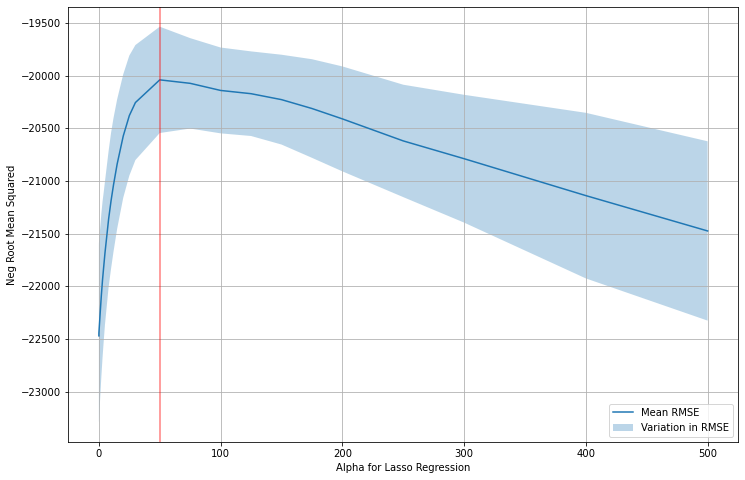

In [123]:
plt.plot(param_grid['alpha'], GS_results['mean_test_score'])
plt.fill_between(param_grid['alpha'], y1=upper_bound, y2=lower_bound, alpha=0.3)
plt.xlabel('Alpha for Lasso Regression')
plt.ylabel('Neg Root Mean Squared')
plt.legend(['Mean RMSE', 'Variation in RMSE'], loc='lower right')
plt.axvline(x=50, c='r', alpha=0.5)
plt.grid(True)
plt.show()

We find that the best parameter for Lasso Regularization seems to be alpha = 50
Mean scores increase till about 50 and then steadily decrease beyond that value. 

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X_full, response, test_size=0.3, random_state=42)

In [185]:
lr_lasso_best_alpha = Lasso(alpha=50)

lr_lasso_best_alpha.fit(X_train, y_train)

Lasso(alpha=50)

In [76]:
append_model_performance('Lasso Model - alpha=50', lr_lasso_best_alpha, X_train, 
                         X_test, y_train, y_test)
model_performance

,algo_name,adj_r2_train,adj_r2_test,Num. Features,rmse_train,rmse_test,variance_error,jb_resid
0,Base Model - All Features,0.917413,0.908630,230,15966.416170,24360.925284,1356.395496,0.0
1,Lasso Model - default,0.916334,0.887554,230,15972.431049,23772.958448,905.270603,0.0
2,Ridge Model - default,0.907708,0.834112,230,16157.025897,22798.894512,737.234140,0.0
3,Elastinet Model - default,0.808145,0.576707,230,21053.970647,26109.528261,988.110119,0.0
4,Lasso Model - alpha=150,0.892351,0.746297,230,16915.050321,22024.292134,564.226987,0.0


We see that the lasso with the best fit parameter is considerably improving the problem of model overfitting.

In [186]:
# writing test submissions to csv

test_preds = lr_lasso_best_alpha.predict(test_full)

In [187]:
test_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': test_preds})
test_submission.set_index('Id', inplace=True)

test_submission.to_csv('Submission_Lasso.csv')

## Regularized Regression - Ridge, with Grid Search

In [77]:
param_grid = {'alpha': [0.5, 1, 2, 5, 10, 15, 18, 20, 22, 25, 30, 50, 75]}
GS_lr_ridge = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')

GS_lr_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.5, 1, 2, 5, 10, 15, 18, 20, 22, 25, 30, 50,
                                   75]},
             scoring='neg_root_mean_squared_error')

In [78]:
GS_lr_ridge.best_params_

{'alpha': 10}

In [79]:
GS_lr_ridge_cv_results = pd.DataFrame(GS_lr_ridge.cv_results_)

In [80]:
# plotting the grid search results

GS_results = GS_lr_ridge_cv_results[['mean_test_score', 'std_test_score']]

upper_bound = GS_results['mean_test_score'] + GS_results['std_test_score']
lower_bound = GS_results['mean_test_score'] - GS_results['std_test_score']

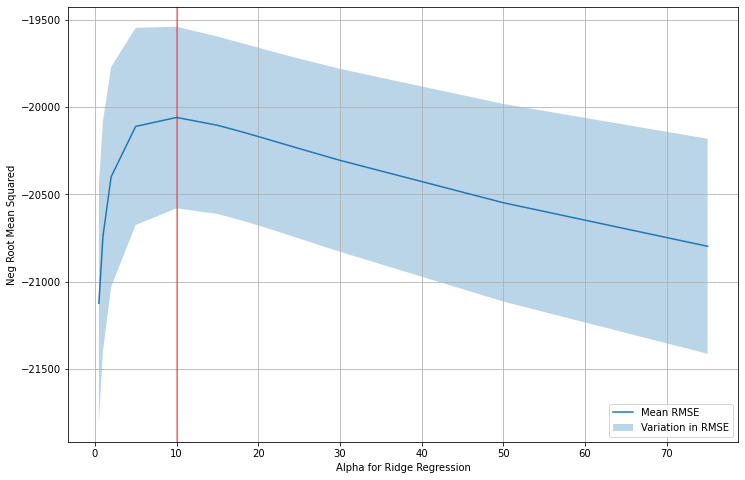

In [82]:
plt.plot(param_grid['alpha'], GS_results['mean_test_score'])
plt.fill_between(param_grid['alpha'], y1=upper_bound, y2=lower_bound, alpha=0.3)

plt.xlabel('Alpha for Ridge Regression')
plt.ylabel('Neg Root Mean Squared')
plt.legend(['Mean RMSE', 'Variation in RMSE'], loc='lower right')
plt.axvline(x=10, c='r', alpha=0.5)
plt.grid(True)

plt.show()

Similar to Lasso regularization, the mean (negative) RMSE increases sharply until alpha=25 and then steadily falls. 

In [83]:
lr_ridge_best_alpha = Ridge(alpha=10)

lr_ridge_best_alpha.fit(X_train, y_train)

Ridge(alpha=10)

In [84]:
append_model_performance('Ridge Model - alpha=10', lr_ridge_best_alpha, X_train, 
                         X_test, y_train, y_test)
model_performance

,algo_name,adj_r2_train,adj_r2_test,Num. Features,rmse_train,rmse_test,variance_error,jb_resid
0,Base Model - All Features,0.917413,0.908630,230,15966.416170,24360.925284,1356.395496,0.0
1,Lasso Model - default,0.916334,0.887554,230,15972.431049,23772.958448,905.270603,0.0
2,Ridge Model - default,0.907708,0.834112,230,16157.025897,22798.894512,737.234140,0.0
3,Elastinet Model - default,0.808145,0.576707,230,21053.970647,26109.528261,988.110119,0.0
4,Lasso Model - alpha=150,0.892351,0.746297,230,16915.050321,22024.292134,564.226987,0.0
5,Ridge Model - alpha=10,0.886929,0.738310,230,17009.907045,22364.973344,581.092686,0.0


In [88]:
sorted(lr_lasso_best_alpha.coef_)

[-18564.81238397254,
 -10729.639096450743,
 -9896.345035669301,
 -6829.089775095269,
 -6716.512824882258,
 -6027.665143810059,
 -5936.359814138924,
 -5820.004520725523,
 -4785.843634663256,
 -4322.832416986766,
 -4151.290185807885,
 -3800.4381782400596,
 -3684.023180368187,
 -3571.425569572296,
 -3417.4483676649506,
 -3256.9749952418038,
 -2977.969530060833,
 -2777.240779576643,
 -2651.8843471202576,
 -2528.9395894335926,
 -2515.9155891736673,
 -2426.4189974092346,
 -1944.0018732824526,
 -1893.1151263496104,
 -1880.8070752357614,
 -1790.2733768990302,
 -1748.82727751925,
 -1706.8964704605892,
 -1449.728207542165,
 -1354.2397925888745,
 -1286.2770305100921,
 -1243.7715269127486,
 -1008.8154545741627,
 -983.2755729210676,
 -959.1912744380851,
 -702.7443665644671,
 -551.9284089564966,
 -257.44194952212627,
 -131.63043478888213,
 -7.107004516434481,
 -6.113217046049161,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0

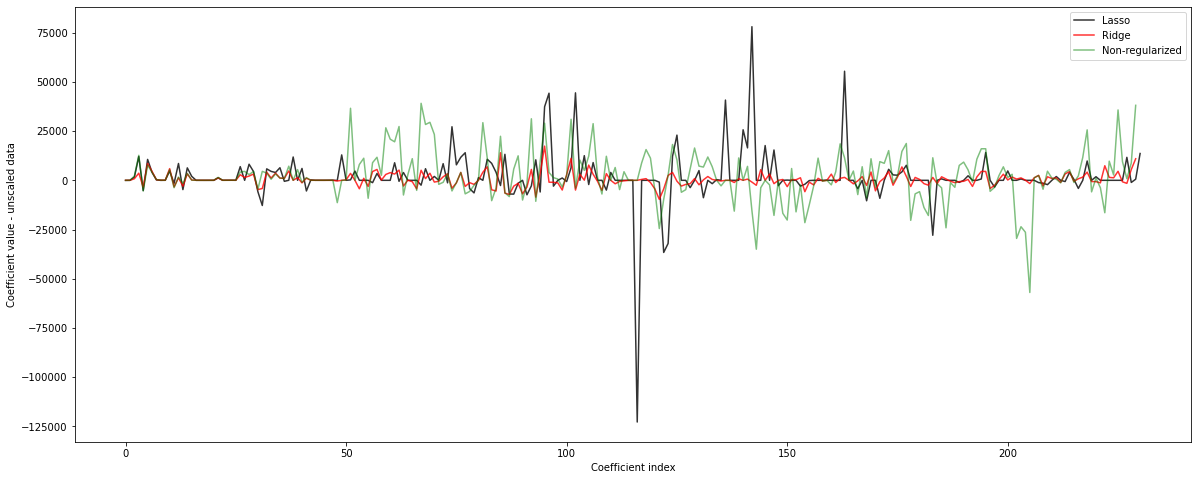

In [189]:
# comparing the coefficients of the base, lasso and ridge linear models.

plt.figure(figsize=[20, 8])

sns.lineplot(data=lr_lasso_best_alpha.coef_, color='black', alpha=0.8)

sns.lineplot(data=lr_ridge_best_alpha.coef_, color='red', alpha=0.8)

sns.lineplot(data=base_model.coef_, color='green', alpha=0.5)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient value - unscaled data')
plt.legend(['Lasso', 'Ridge', 'Non-regularized'])
plt.show()

From the above chart, we see that ridge regression seems to be shrinking the coefficients the model the most, while lasso regularization is bringing most of the coefficient values to zero. 

# RFE

# SFS

# Other Regressors

# Stacked Regressor